## Data preproccesing

### Loading & preparing the dataset

In [1]:
import pandas as pd
import os

In [2]:
# Specify the directory containing your CSV files
csv_directory = 'data'

In [3]:
# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and append its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path)
    combined_df = combined_df.append(df, ignore_index=True)



In [4]:
type(combined_df)

pandas.core.frame.DataFrame

In [4]:
# exclude the moves with the labels "STOP", so we don´t have the duplicates of the moves
values_to_exclude = ['STOP']
df = combined_df[~combined_df['Behavior type'].isin(values_to_exclude)]

In [5]:
# exclude the music_start and music_stop tokens
values_to_exclude = ['music_start', 'music_stop' ]
df = df[~combined_df['Behavior'].isin(values_to_exclude)]

/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df

,Observation id,Observation date,Description,Observation duration,Observation type,Source,Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
1,ratingcont_L2F2_free_video,2023-12-21 23:21:26,NaN,180.781,Media file(s),player #1:ratingcont_L2F2_free_video.MOV,208.708,29.97,L2F2,groove_walk,move,START,11.311,ratingcont_L2F2_free_video.MOV,339,NaN,NaN
3,ratingcont_L2F2_free_video,2023-12-21 23:21:26,NaN,180.781,Media file(s),player #1:ratingcont_L2F2_free_video.MOV,208.708,29.97,L2F2,lindy_circle,move,START,17.117,ratingcont_L2F2_free_video.MOV,513,NaN,NaN
5,ratingcont_L2F2_free_video,2023-12-21 23:21:26,NaN,180.781,Media file(s),player #1:ratingcont_L2F2_free_video.MOV,208.708,29.97,L2F2,swingout,move,START,20.888,ratingcont_L2F2_free_video.MOV,626,NaN,NaN
7,ratingcont_L2F2_free_video,2023-12-21 23:21:26,NaN,180.781,Media file(s),player #1:ratingcont_L2F2_free_video.MOV,208.708,29.97,L2F2,swingout,move,START,24.191,ratingcont_L2F2_free_video.MOV,725,NaN,NaN
9,ratingcont_L2F2_free_video,2023-12-21 23:21:26,NaN,180.781,Media file(s),player #1:ratingcont_L2F2_free_video.MOV,208.708,29.97,L2F2,break,improvisational_break,START,27.628,ratingcont_L2F2_free_video.MOV,828,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,ratingcont_L3F3_free_video,2023-12-23 17:36:39,NaN,180.581,Media file(s),player #1:ratingcont_L3F3_free_video.MOV,203.703,29.97,L3F3,break,improvisational_break,START,175.008,ratingcont_L3F3_free_video.MOV,5245,NaN,NaN
4507,ratingcont_L3F3_free_video,2023-12-23 17:36:39,NaN,180.581,Media file(s),player #1:ratingcont_L3F3_free_video.MOV,203.703,29.97,L3F3,send_out,move,START,179.179,ratingcont_L3F3_free_video.MOV,5370,NaN,NaN
4509,ratingcont_L3F3_free_video,2023-12-23 17:36:39,NaN,180.581,Media file(s),player #1:ratingcont_L3F3_free_video.MOV,203.703,29.97,L3F3,come_back,move,START,181.882,ratingcont_L3F3_free_video.MOV,5451,NaN,NaN
4511,ratingcont_L3F3_free_video,2023-12-23 17:36:39,NaN,180.581,Media file(s),player #1:ratingcont_L3F3_free_video.MOV,203.703,29.97,L3F3,basic_closed,move,START,184.584,ratingcont_L3F3_free_video.MOV,5532,NaN,NaN


In [7]:
moves_sequences_df = df.groupby('Observation id')['Behavior'].agg(list).reset_index()


In [8]:
moves_sequences_df

,Observation id,Behavior
0,ratingcont_L10F10_closed_video,"[groove_walk, swingout, swingout, swingout, li..."
1,ratingcont_L10F10_free_video,"[groove_walk, swingout, swingout, swingout, li..."
2,ratingcont_L10F10_open_video,"[groove_walk, swingout, pass_by, pass_by, come..."
3,ratingcont_L10F9_closed_video,"[swingout, swingout, swingout, swingout, lindy..."
4,ratingcont_L10F9_free_video,"[swingout, swingout, swingout, lindy_circle, t..."
5,ratingcont_L10F9_open_video,"[swingout, swingout, swingout, pass_by, pass_b..."
6,ratingcont_L11F11_closed_video,"[come_back, basic_closed, send_out, pass_by, o..."
7,ratingcont_L11F11_free_video,"[groove_walk, basic_closed, basic_closed, send..."
8,ratingcont_L11F11_open_video,"[come_back, basic_closed, send_out, pass_by, p..."
9,ratingcont_L11F12_closed_video,"[groove_walk, come_back, basic_closed, basic_c..."


In [8]:
# Save the DataFrame to a CSV file
moves_sequences_df.to_csv('LindyHop_moves_sequences.csv', index=False)

In [33]:
# Convert lists to strings
##moves_sequences_df['Behavior'] = data['Behavior'].apply(lambda x: str(x))
# Save to CSV
##moves_sequences_df.to_csv('LindyHop_moves_sequences.csv', index=False)

In [77]:
# Convert lists to strings
##moves_sequences_df['Behavior'] = data['Behavior'].apply(lambda x: str(x))

# Save to CSV
##moves_sequences_df.to_csv('filename.csv', index=False)

In [9]:
# Extract the lists from the specified column
lists_extracted = moves_sequences_df['Behavior'].tolist()


# Print the result
print(lists_extracted)

[['groove_walk', 'swingout', 'swingout', 'swingout', 'lindy_circle', 'basic_closed', 'tuck_turn', 'pass_by', 'come_back', 'basic_closed', 'swingout', 'swingout', 'swingout', 'swingout', 'pass_by', 'pass_by', 'sugar_push', 'pass_by', 'come_back', 'swingout', 'swingout', 'swingout', 'swingout', 'come_back', 'tuck_turn', 'pass_by', 'pass_by', 'outside_spin', 'pass_by', 'come_back', 'tuck_turn', 'pass_by', 'pass_by', 'sugar_push', 'pass_by', 'outside_spin', 'come_back', 'swingout', 'lindy_circle', 'tuck_turn', 'pass_by', 'swingout', 'swingout', 'swingout', 'swingout', 'lindy_circle', 'basic_closed', 'tuck_turn', 'pass_by', 'pass_by', 'sugar_push', 'come_back', 'tuck_turn', 'pass_by', 'sugar_push', 'pass_by', 'outside_spin', 'come_back', 'basic_closed', 'swingout', 'swingout', 'swingout'], ['groove_walk', 'swingout', 'swingout', 'swingout', 'lindy_circle', 'basic_closed', 'tuck_turn', 'pass_by', 'lindy_circle', 'send_out', 'pass_by', 'outside_spin', 'come_back', 'swingout', 'swingout', 'swi

In [10]:
len(lists_extracted)

41

In [11]:
# Calculate the length of each sequence and get min and max and total of items
lengths = [len(sublist) for sublist in lists_extracted]
# Find the minimum and maximum lengths
min_length = min(lengths) if lengths else None
max_length = max(lengths) if lengths else None
total = sum(lengths)

print("Minimum length:", min_length)
print("Maximum length:", max_length)
print("Total:", total)

Minimum length: 14
Maximum length: 66
Total: 2219


In [43]:
# Use a list comprehension to create a list of strings
## list_of_strings = [', '.join(sublist) for sublist in lists_extracted]


In [45]:
# 'sequences' is a list containing the dance move sequences
# Flatten the list of sequences
## flat_sequences = [move for sequence in lists_extracted for move in sequence]


## Many-to-One LSTM model

#### Create input-output pairs 

The function to split the sequence data into input and target arrays is created. It maintains the sequence structure in the following way:
-  it loops through each sequence (equivalent to one dance) and creates input-output pairs only from the current sequence or dance ("for sequence in encoded_sequences")

The resulting function makes sure that *music_stop* token is never taken as an input to predict the next move, while it is still used as a target to be predicted based on the move just before it. The *music_start* token is never used as a target to be predicted base on the previous move, while it is still used as an input to predict the next move. This way, each dance sequence is treated separately.

#### Functions

In [12]:
# Function to create input-ouput sequences for many-to-many (mtm) modeling
def create_input_output_pairs_mtm(data, time_steps):
    x, y = [], []

    for sequence in data:
        for i in range(len(sequence) - time_steps):
            x.append(sequence[i:(i + time_steps)])  # Input sequence of 4 moves
            y.append(sequence[(i + 1):(i + 1 + time_steps)])  # Output sequence of 4 moves

    return x, y

In [13]:
# matplotlib
import matplotlib.pyplot as plt


def plot_history(H, epochs):
    """
    Utility function for plotting model history using matplotlib
    
    H: model history 
    epochs: number of epochs for which the model was trained
    """
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()
    

## Many-to-Many LSTM models

### Preparing the data for LSTM

#### Encode the moves to integers

The sequences of dance moves are encoded while maintaining the sequence structure so each dance is encoded separately and outputed as separate arrays

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [15]:
lists_extracted

[['groove_walk',
  'swingout',
  'swingout',
  'swingout',
  'lindy_circle',
  'basic_closed',
  'tuck_turn',
  'pass_by',
  'come_back',
  'basic_closed',
  'swingout',
  'swingout',
  'swingout',
  'swingout',
  'pass_by',
  'pass_by',
  'sugar_push',
  'pass_by',
  'come_back',
  'swingout',
  'swingout',
  'swingout',
  'swingout',
  'come_back',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'outside_spin',
  'pass_by',
  'come_back',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'sugar_push',
  'pass_by',
  'outside_spin',
  'come_back',
  'swingout',
  'lindy_circle',
  'tuck_turn',
  'pass_by',
  'swingout',
  'swingout',
  'swingout',
  'swingout',
  'lindy_circle',
  'basic_closed',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'sugar_push',
  'come_back',
  'tuck_turn',
  'pass_by',
  'sugar_push',
  'pass_by',
  'outside_spin',
  'come_back',
  'basic_closed',
  'swingout',
  'swingout',
  'swingout'],
 ['groove_walk',
  'swingout',
  'swingout',
  'swingout',
  'lindy_circle',
  'ba

In [16]:
# Flatten all sequences into a single list to find unique moves
all_moves = [move for sequence in lists_extracted for move in sequence]

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(all_moves)

# Number of unique classes (moves)
num_classes = len(label_encoder.classes_)

# Function to convert moves to integers
def encode_sequence(sequence):
    # Encode the sequence
    return label_encoder.transform(sequence)

# Apply encoding to each sequence
encoded_sequences = [encode_sequence(sequence) for sequence in lists_extracted]
encoded_sequences


[array([ 9, 28, 28, 28, 15,  2, 31, 19,  5,  2, 28, 28, 28, 28, 19, 19, 26,
        19,  5, 28, 28, 28, 28,  5, 31, 19, 19, 17, 19,  5, 31, 19, 19, 26,
        19, 17,  5, 28, 15, 31, 19, 28, 28, 28, 28, 15,  2, 31, 19, 19, 26,
         5, 31, 19, 26, 19, 17,  5,  2, 28, 28, 28]),
 array([ 9, 28, 28, 28, 15,  2, 31, 19, 15, 24, 19, 17,  5, 28, 28, 28, 28,
        15,  2, 31, 19, 19, 19, 19, 19,  3, 28, 28, 28, 28, 28, 15,  2, 31,
        19, 19, 19, 17,  6, 28, 28, 28, 28, 28, 15, 31, 19, 19, 19, 19, 19,
        28, 28, 28,  5,  2, 24, 28, 28, 28]),
 array([ 9, 28, 19, 19,  5, 31,  2, 31, 19, 28, 28,  5, 31, 19, 19, 28, 28,
        28, 15, 31, 19, 17, 19, 19, 19, 27, 19, 26, 19,  5, 31, 19, 19, 28,
        28, 28, 15,  2, 31, 19, 17,  5,  2,  2, 31, 19, 26, 19]),
 array([28, 28, 28, 28, 15, 31, 19,  5, 28, 28, 28, 15, 31, 19, 17,  5,  2,
        31, 19, 26, 27, 19, 19, 26,  3, 28, 28, 28, 28, 15, 31, 19, 17, 26,
        27, 19, 26, 19, 19,  5, 31, 19, 28, 28, 15, 31, 19, 19, 26, 27, 19

#### Extracting the encoded labels

In [17]:
# Extract class labels
class_labels = label_encoder.classes_

# Display the mapping between encoded numbers and original class labels
for i, label in enumerate(class_labels):
    print(f"Encoded number {i} corresponds to class label '{label}'")

Encoded number 0 corresponds to class label 'barrel_turn'
Encoded number 1 corresponds to class label 'basic_charleston'
Encoded number 2 corresponds to class label 'basic_closed'
Encoded number 3 corresponds to class label 'basic_open'
Encoded number 4 corresponds to class label 'break'
Encoded number 5 corresponds to class label 'come_back'
Encoded number 6 corresponds to class label 'corridor'
Encoded number 7 corresponds to class label 'frankie´s_points'
Encoded number 8 corresponds to class label 'frankie´s_sixes'
Encoded number 9 corresponds to class label 'groove_walk'
Encoded number 10 corresponds to class label 'hallelujah_rocks'
Encoded number 11 corresponds to class label 'hand_to_hand'
Encoded number 12 corresponds to class label 'hand_to_hand_charleston'
Encoded number 13 corresponds to class label 'inside_spin'
Encoded number 14 corresponds to class label 'inside_turn'
Encoded number 15 corresponds to class label 'lindy_circle'
Encoded number 16 corresponds to class label

#### Prepare the iput-output data 


The function below splits the sequence data into input and target arrays of 4 moves. It maintains the sequence structure in the following way:
-  it loops through each sequence (equivalent to one dance) and creates input-output combinations of 4 moves only from the current sequence or dance ("for sequence in data")

The resulting function makes sure that the last move of each sequence is never taken as an input to predict the next move, while it is still used as a target to be predicted based on the move just before it. The first move is never used as a target to be predicted base on the previous move, while it is still used as an input to predict the next move. This way, each dance sequence is treated separately.

In [53]:
# I will be using encoded sequences from before
encoded_sequences

[array([ 9, 28, 28, 28, 15,  2, 31, 19,  5,  2, 28, 28, 28, 28, 19, 19, 26,
        19,  5, 28, 28, 28, 28,  5, 31, 19, 19, 17, 19,  5, 31, 19, 19, 26,
        19, 17,  5, 28, 15, 31, 19, 28, 28, 28, 28, 15,  2, 31, 19, 19, 26,
         5, 31, 19, 26, 19, 17,  5,  2, 28, 28, 28]),
 array([ 9, 28, 28, 28, 15,  2, 31, 19, 15, 24, 19, 17,  5, 28, 28, 28, 28,
        15,  2, 31, 19, 19, 19, 19, 19,  3, 28, 28, 28, 28, 28, 15,  2, 31,
        19, 19, 19, 17,  6, 28, 28, 28, 28, 28, 15, 31, 19, 19, 19, 19, 19,
        28, 28, 28,  5,  2, 24, 28, 28, 28]),
 array([ 9, 28, 19, 19,  5, 31,  2, 31, 19, 28, 28,  5, 31, 19, 19, 28, 28,
        28, 15, 31, 19, 17, 19, 19, 19, 27, 19, 26, 19,  5, 31, 19, 19, 28,
        28, 28, 15,  2, 31, 19, 17,  5,  2,  2, 31, 19, 26, 19]),
 array([28, 28, 28, 28, 15, 31, 19,  5, 28, 28, 28, 15, 31, 19, 17,  5,  2,
        31, 19, 26, 27, 19, 19, 26,  3, 28, 28, 28, 28, 15, 31, 19, 17, 26,
        27, 19, 26, 19, 19,  5, 31, 19, 28, 28, 15, 31, 19, 19, 26, 27, 19

In [17]:
xx, yy = create_input_output_pairs_mtm(encoded_sequences, 4)


In [16]:
#xx, yy = create_input_output_pairs_mtm(encoded_sequences, 8)

In [18]:
yy

[array([28, 28, 28, 15]),
 array([28, 28, 15,  2]),
 array([28, 15,  2, 31]),
 array([15,  2, 31, 19]),
 array([ 2, 31, 19,  5]),
 array([31, 19,  5,  2]),
 array([19,  5,  2, 28]),
 array([ 5,  2, 28, 28]),
 array([ 2, 28, 28, 28]),
 array([28, 28, 28, 28]),
 array([28, 28, 28, 19]),
 array([28, 28, 19, 19]),
 array([28, 19, 19, 26]),
 array([19, 19, 26, 19]),
 array([19, 26, 19,  5]),
 array([26, 19,  5, 28]),
 array([19,  5, 28, 28]),
 array([ 5, 28, 28, 28]),
 array([28, 28, 28, 28]),
 array([28, 28, 28,  5]),
 array([28, 28,  5, 31]),
 array([28,  5, 31, 19]),
 array([ 5, 31, 19, 19]),
 array([31, 19, 19, 17]),
 array([19, 19, 17, 19]),
 array([19, 17, 19,  5]),
 array([17, 19,  5, 31]),
 array([19,  5, 31, 19]),
 array([ 5, 31, 19, 19]),
 array([31, 19, 19, 26]),
 array([19, 19, 26, 19]),
 array([19, 26, 19, 17]),
 array([26, 19, 17,  5]),
 array([19, 17,  5, 28]),
 array([17,  5, 28, 15]),
 array([ 5, 28, 15, 31]),
 array([28, 15, 31, 19]),
 array([15, 31, 19, 28]),
 array([31, 

In [19]:
# Convert x and y to one-hot encoding
xx_one_hot = to_categorical(xx, num_classes=num_classes)
yy_one_hot = to_categorical(yy, num_classes=num_classes)

# Check shapes
print("Shape of xx:", xx_one_hot.shape)
print("Shape of yy:", yy_one_hot.shape)

Shape of xx: (2055, 4, 32)
Shape of yy: (2055, 4, 32)


In [20]:
# Convert to TensorFlow tensors
xx_tensor = tf.convert_to_tensor(xx_one_hot)
yy_tensor = tf.convert_to_tensor(yy_one_hot)

# Check shapes
print("Shape of xx:", xx_tensor.shape)
print("Shape of yy:", yy_tensor.shape)

Shape of xx: (2055, 4, 32)
Shape of yy: (2055, 4, 32)


In [21]:
# Splitting the data into training and testing sets (80-20 split)
split_index_2 = int(0.8 * len(xx_tensor))
xx_train, xx_val = xx_tensor[:split_index_2], xx_tensor[split_index_2:]
yy_train, yy_val = yy_tensor[:split_index_2], yy_tensor[split_index_2:]

# Check shapes
print("Shape of xx_train:", xx_train.shape)
print("Shape of yy_train:", yy_train.shape)

Shape of xx_train: (1644, 4, 32)
Shape of yy_train: (1644, 4, 32)


###  Baseline Many-to-Many LSTM model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
import random


# Set a new random seed
new_seed = 42
tf.random.set_seed(new_seed)
np.random.seed(new_seed)
random.seed(new_seed)

# Define the LSTM model for many-to-many
many_to_many_baseline_model = Sequential([
    LSTM(64, input_shape=(4, 32), return_sequences=True), # 64 units, return full sequence
    Dropout(0.2),                                         # Dropout for regularization
    TimeDistributed(Dense(32, activation='softmax'))      # Apply Dense layer to each timestep
])

# Compile the model
many_to_many_baseline_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
many_to_many_baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 64)             24832     
_________________________________________________________________
dropout (Dropout)            (None, 4, 64)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 4, 32)             2080      
Total params: 26,912
Trainable params: 26,912
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Fit the model (batch size 16)
history_many_to_many_baseline = many_to_many_baseline_model.fit(xx_train, yy_train, 
                                              epochs=1000,  
                                              batch_size=16, 
                                              validation_data=(xx_val, yy_val)
                                               ) 


Epoch 1/1000
103/103 [==============================] - 3s 8ms/step - loss: 3.2774 - accuracy: 0.2151 - val_loss: 2.6921 - val_accuracy: 0.3954
Epoch 2/1000
103/103 [==============================] - 0s 3ms/step - loss: 2.6079 - accuracy: 0.3142 - val_loss: 2.4834 - val_accuracy: 0.4027
Epoch 3/1000
103/103 [==============================] - 0s 3ms/step - loss: 2.3838 - accuracy: 0.3373 - val_loss: 2.3034 - val_accuracy: 0.4483
Epoch 4/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.1787 - accuracy: 0.4011 - val_loss: 2.2299 - val_accuracy: 0.4538
Epoch 5/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.0721 - accuracy: 0.4258 - val_loss: 2.2049 - val_accuracy: 0.4519
Epoch 6/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.0184 - accuracy: 0.4290 - val_loss: 2.1867 - val_accuracy: 0.4501
Epoch 7/1000
103/103 [==============================] - 0s 4ms/step - loss: 1.9631 - accuracy: 0.4351 - val_loss: 2.1726 - val_accuracy:

In [137]:
# Save the model
model_file = "many_to_many_LSTM_baseline_model.h5"  
many_to_many_baseline_model.save(model_file)

In [144]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_baseline_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_baseline.history, file)

In [25]:
# Extract and print metrics from the loaded history dictionary
def print_metrics(history_dict):
    val_accuracy_per_epoch = history_dict['val_accuracy']
    train_accuracy_per_epoch = history_dict['accuracy']
    train_loss_per_epoch = history_dict['loss']
    val_loss_per_epoch = history_dict['val_loss']

    best_epoch_val_accuracy = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch)) + 1
    best_epoch_train_accuracy = train_accuracy_per_epoch.index(max(train_accuracy_per_epoch)) + 1
    best_epoch_train_loss = train_loss_per_epoch.index(min(train_loss_per_epoch)) + 1
    best_epoch_val_loss = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1

    print(f"Best Epoch for Validation Accuracy: {best_epoch_val_accuracy} (Val Accuracy: {max(val_accuracy_per_epoch)})")
    print(f"Best Epoch for Training Accuracy: {best_epoch_train_accuracy} (Train Accuracy: {max(train_accuracy_per_epoch)})")
    print(f"Best Epoch for Training Loss: {best_epoch_train_loss} (Train Loss: {min(train_loss_per_epoch)})")
    print(f"Best Epoch for Validation Loss: {best_epoch_val_loss} (Val Loss: {min(val_loss_per_epoch)})")
    print("\nOverall Best Performance Metrics:")
    print(f"Maximum Validation Accuracy: {max(val_accuracy_per_epoch)}")
    print(f"Maximum Training Accuracy: {max(train_accuracy_per_epoch)}")
    print(f"Minimum Training Loss: {min(train_loss_per_epoch)}")
    print(f"Minimum Validation Loss: {min(val_loss_per_epoch)}")


In [58]:
# Extract and print metrics from the history file
def print_metrics_history(history):
    val_accuracy_per_epoch = history.history['val_accuracy']
    train_accuracy_per_epoch = history.history['accuracy']
    train_loss_per_epoch = history.history['loss']
    val_loss_per_epoch = history.history['val_loss']

    best_epoch_val_accuracy = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch)) + 1
    best_epoch_train_accuracy = train_accuracy_per_epoch.index(max(train_accuracy_per_epoch)) + 1
    best_epoch_train_loss = train_loss_per_epoch.index(min(train_loss_per_epoch)) + 1
    best_epoch_val_loss = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1

    print(f"Best Epoch for Validation Accuracy: {best_epoch_val_accuracy} (Val Accuracy: {max(val_accuracy_per_epoch)})")
    print(f"Best Epoch for Training Accuracy: {best_epoch_train_accuracy} (Train Accuracy: {max(train_accuracy_per_epoch)})")
    print(f"Best Epoch for Training Loss: {best_epoch_train_loss} (Train Loss: {min(train_loss_per_epoch)})")
    print(f"Best Epoch for Validation Loss: {best_epoch_val_loss} (Val Loss: {min(val_loss_per_epoch)})")
    print("\nOverall Best Performance Metrics:")
    print(f"Maximum Validation Accuracy: {max(val_accuracy_per_epoch)}")
    print(f"Maximum Training Accuracy: {max(train_accuracy_per_epoch)}")
    print(f"Minimum Training Loss: {min(train_loss_per_epoch)}")
    print(f"Minimum Validation Loss: {min(val_loss_per_epoch)}")

In [26]:
import pickle

# import the model´s history
with open('many_to_many_LSTM_baseline_model_history_bs16.pkl', 'rb') as file:
    history_many_to_many_baseline = pickle.load(file)

# Access the history data
#training_loss = loaded_history['loss']
#validation_loss = loaded_history['val_loss']
#training_accuracy = loaded_history.get('accuracy') 
#validation_accuracy = loaded_history.get('val_accuracy') 

print_metrics(history_many_to_many_baseline)



Best Epoch for Validation Accuracy: 4 (Val Accuracy: 0.45377129316329956)
Best Epoch for Training Accuracy: 858 (Train Accuracy: 0.566453754901886)
Best Epoch for Training Loss: 979 (Train Loss: 1.2380450963974)
Best Epoch for Validation Loss: 11 (Val Loss: 2.162454843521118)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.45377129316329956
Maximum Training Accuracy: 0.566453754901886
Minimum Training Loss: 1.2380450963974
Minimum Validation Loss: 2.162454843521118


In [51]:
from sklearn.metrics import classification_report

# Predict classes on the test set
yy_pred = many_to_many_baseline_model.predict(xx_val)

# Convert predictions from one-hot encoded back to label indices
yy_pred_classes = np.argmax(yy_pred, axis=-1)
yy_true_classes = np.argmax(yy_val, axis=-1)

# Convert numeric classes to actual labels
yy_pred_labels = [class_labels[i] for i in yy_pred_classes.flatten()]
yy_true_labels = [class_labels[i] for i in yy_true_classes.flatten()]

# Generate a confusion matrix
#conf_matrix = confusion_matrix(yy_true_classes.flatten(), yy_pred_classes.flatten())

# Calculate precision, recall, and F1-score for each class
class_report = classification_report(yy_true_labels, yy_pred_labels, zero_division=0)
print(class_report)





                  precision    recall  f1-score   support

     barrel_turn       0.00      0.00      0.00        36
    basic_closed       0.55      0.34      0.42       143
      basic_open       0.00      0.00      0.00        18
           break       0.17      0.08      0.10       106
       come_back       0.01      0.01      0.01        81
        corridor       0.00      0.00      0.00        11
 frankie´s_sixes       0.20      0.07      0.11        41
     groove_walk       0.00      0.00      0.00        10
hallelujah_rocks       0.00      0.00      0.00         4
    hand_to_hand       0.00      0.00      0.00         8
     inside_spin       0.00      0.00      0.00         4
     inside_turn       0.00      0.00      0.00        35
    lindy_circle       0.00      0.00      0.00         4
        mini_dip       0.00      0.00      0.00         0
    outside_spin       0.00      0.00      0.00        40
    outside_turn       0.00      0.00      0.00        24
         pass

In [91]:
type(class_report)

str

In [92]:
# Write the string to a text file
with open('rrrr.csv', 'w') as file:
    file.write(class_report)

In [53]:

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(8, 6))  # You can adjust the figure size as needed

# Add the classification report text
ax.text(0.5, 0.5, class_report, horizontalalignment='center', verticalalignment='center', 
        fontsize=12, family='monospace')

# Remove the axes
ax.axis('off')

# Save the figure 
plt.savefig('classification_report_many_to_many_LSTM_baseline_model.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()

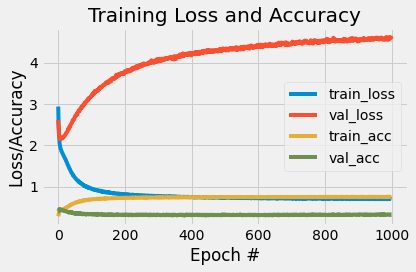

In [35]:
# plot
plot_history(history_many_to_many_baseline, epochs = 1000)

In [73]:
# Fit the model (batch size 32)
history_many_to_many_baseline_32 = many_to_many_baseline_model.fit(xx_train, yy_train, 
                                              epochs=1000,  # Adjust the number of epochs based on training performance
                                              batch_size=32, 
                                              validation_data=(xx_test, yy_test)  # Validation data
                                               ) 


Epoch 1/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.2374 - accuracy: 0.5646 - val_loss: 3.3484 - val_accuracy: 0.3467
Epoch 2/1000
52/52 [==============================] - 0s 4ms/step - loss: 1.2313 - accuracy: 0.5619 - val_loss: 3.3500 - val_accuracy: 0.3461
Epoch 3/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.2430 - accuracy: 0.5610 - val_loss: 3.3529 - val_accuracy: 0.3443
Epoch 4/1000
52/52 [==============================] - 0s 4ms/step - loss: 1.2348 - accuracy: 0.5628 - val_loss: 3.3452 - val_accuracy: 0.3467
Epoch 5/1000
52/52 [==============================] - 0s 4ms/step - loss: 1.2370 - accuracy: 0.5640 - val_loss: 3.3453 - val_accuracy: 0.3485
Epoch 6/1000
52/52 [==============================] - 0s 4ms/step - loss: 1.2338 - accuracy: 0.5639 - val_loss: 3.3553 - val_accuracy: 0.3479
Epoch 7/1000
52/52 [==============================] - 0s 4ms/step - loss: 1.2398 - accuracy: 0.5651 - val_loss: 3.3558 - val_accuracy: 0.3455
Epoch 

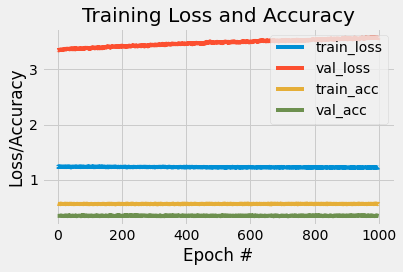

In [81]:
# plot
plot_history(history_many_to_many_baseline_32, epochs = 1000)

In [145]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_baseline_model_history_bs32.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_baseline_32.history, file)

In [82]:
# Fit the model (batch size 64)
history_many_to_many_baseline_64 = many_to_many_baseline_model.fit(xx_train, yy_train, 
                                              epochs=1000,  # Adjust the number of epochs based on training performance
                                              batch_size=64, 
                                              validation_data=(xx_test, yy_test)  # Validation data
                                               ) 


Epoch 1/1000
26/26 [==============================] - 0s 8ms/step - loss: 1.2166 - accuracy: 0.5672 - val_loss: 3.5698 - val_accuracy: 0.3443
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.2217 - accuracy: 0.5627 - val_loss: 3.5758 - val_accuracy: 0.3479
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.2165 - accuracy: 0.5648 - val_loss: 3.5837 - val_accuracy: 0.3443
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.2175 - accuracy: 0.5654 - val_loss: 3.5885 - val_accuracy: 0.3461
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.2148 - accuracy: 0.5669 - val_loss: 3.5799 - val_accuracy: 0.3467
Epoch 6/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.2169 - accuracy: 0.5645 - val_loss: 3.5788 - val_accuracy: 0.3431
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.2164 - accuracy: 0.5663 - val_loss: 3.5835 - val_accuracy: 0.3443
Epoch 

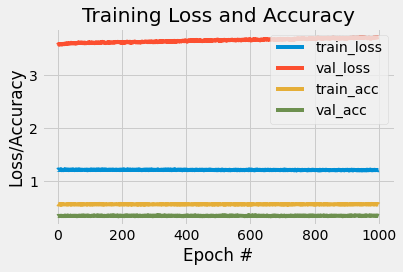

In [85]:
# plot
plot_history(history_many_to_many_baseline_64, epochs = 1000)

In [146]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_baseline_model_history_bs64.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_baseline_64.history, file)

#### Accuracies for individual moves

In [218]:
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

# Predict labels on the test data
predictions = many_to_many_model.predict(xx_test)

# Convert one-hot encoded predictions to single labels using TensorFlow's argmax
predicted_labels_encoded = tf.argmax(predictions, axis=-1).numpy()

# Flatten the arrays for label-wise accuracy calculation
predicted_labels_encoded = predicted_labels_encoded.flatten()

# Convert one-hot encoded true labels to single labels using TensorFlow's argmax
true_labels_encoded = tf.argmax(yy_test, axis=-1).numpy().flatten()

# Map predicted labels to original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Map true labels to original labels
true_labels = label_encoder.inverse_transform(true_labels_encoded)

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Accuracy: {overall_accuracy}')

# Display label-wise accuracy
unique_labels = label_encoder.classes_
for label in unique_labels:
    label_indices = true_labels == label
    label_accuracy = accuracy_score(true_labels[label_indices], predicted_labels[label_indices])
    print(f'Accuracy for Label {label}: {label_accuracy}')



Overall Accuracy: 0.33747044917257685
Accuracy for Label barrel_turn: 0.0
Accuracy for Label basic_charleston: nan
Accuracy for Label basic_closed: 0.28
Accuracy for Label basic_open: 0.0
Accuracy for Label bounce: nan
Accuracy for Label break: 0.037037037037037035
Accuracy for Label breakaway: 0.0
Accuracy for Label come_back: 0.027777777777777776
Accuracy for Label corridor: 0.0
Accuracy for Label follow_takes_over: nan
Accuracy for Label frankie´s_points: nan
Accuracy for Label frankie´s_sixes: 0.046511627906976744
Accuracy for Label groove_walk: 0.6363636363636364
Accuracy for Label hallelujah_rocks: 0.0
Accuracy for Label hand_to_hand: 0.0
Accuracy for Label hand_to_hand_charleston: nan
Accuracy for Label inside_spin: 0.0
Accuracy for Label inside_turn: 0.0
Accuracy for Label lindy_circle: 0.0
Accuracy for Label mini_dip: nan
Accuracy for Label mistake: 0.0
Accuracy for Label music_start: nan
Accuracy for Label music_stop: 0.0
Accuracy for Label one_hand: 0.0
Accuracy for Label ou

/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in

#### Classification report and Confusion Matrix

In [219]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes on the test set
yy_pred = many_to_many_model.predict(xx_test)

# Convert predictions from one-hot encoded back to label indices
yy_pred_classes = np.argmax(yy_pred, axis=-1)
yy_true_classes = np.argmax(yy_test, axis=-1)

# Generate a confusion matrix
conf_matrix = confusion_matrix(yy_true_classes.flatten(), yy_pred_classes.flatten())

# Calculate precision, recall, and F1-score for each class
class_report = classification_report(yy_true_classes.flatten(), yy_pred_classes.flatten())




/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

In [221]:
%matplotlib inline


/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


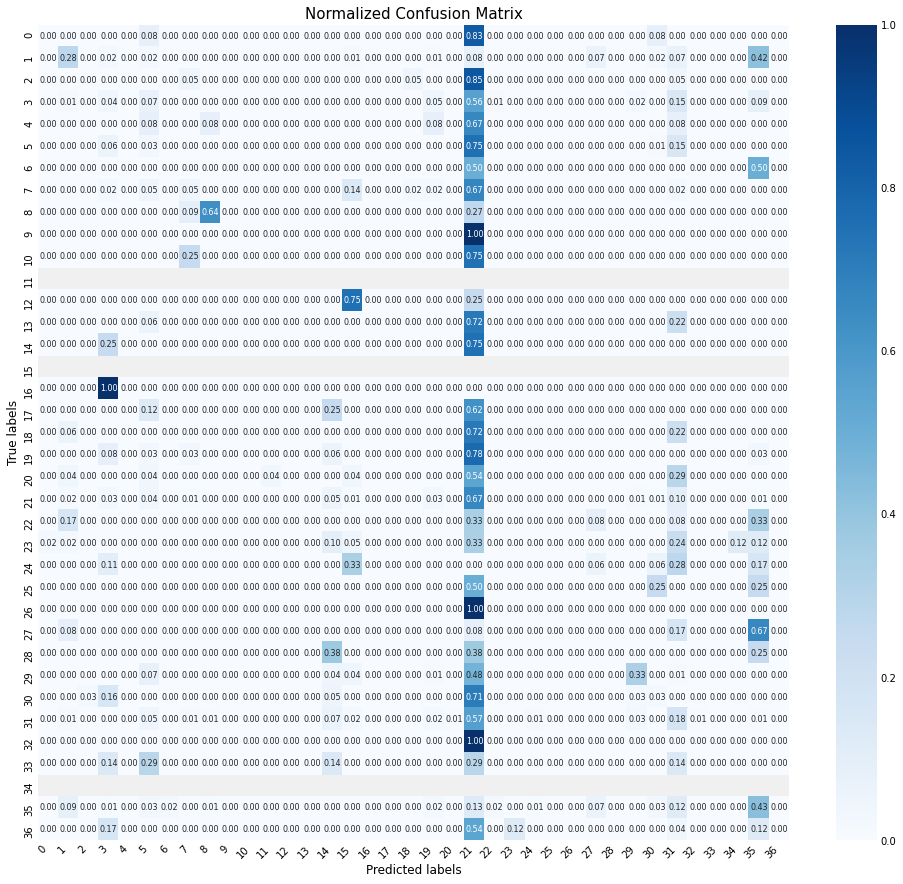

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15, 15))  # Figure size

# Plotting the confusion matrix
ax = sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', 
                 annot_kws={"size": 8})  # Adjust annotation font size

# Rotating labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate the x labels and set their alignment
plt.yticks(fontsize=10)  # Set y labels font size
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Normalized Confusion Matrix', fontsize=15)

# Adding a colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Set colorbar label size

plt.show()


In [194]:
print("\nClass-wise Accuracy:\n", class_report)


Class-wise Accuracy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           2       0.45      0.15      0.22       150
           3       0.00      0.00      0.00        20
           5       0.03      0.01      0.02        81
           6       0.00      0.00      0.00        12
           7       0.03      0.03      0.03        72
           8       0.00      0.00      0.00        12
          11       0.14      0.05      0.07        43
          12       0.58      0.64      0.61        11
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00        36
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         4
          22       0.50      0.12      0.20         8
    

### A more complex Many-to-Many LSTM

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
import random
from tensorflow.keras.regularizers import l1_l2

# Set a new random seed
new_seed = 75
tf.random.set_seed(new_seed)
np.random.seed(new_seed)
random.seed(new_seed)

# Define a more complex LSTM model
many_to_many_model_complex = Sequential([
    LSTM(64, return_sequences=True, input_shape=(4, 32)), 
    Dropout(0.4),
    LSTM(32, return_sequences=True),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dense(32, activation='softmax')
])

# Compile the simplified model
many_to_many_model_complex.compile(optimizer='adam', 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])

# Summary of the simplified model
many_to_many_model_complex.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4, 64)             24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 32)             12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4, 64)             2112      
_________________________________________________________________
dense_2 (Dense)              (None, 4, 32)             2080      
Total params: 41,440
Trainable params: 41,440
Non-trainable params: 0
__________________________________________________

In [56]:
# Fit the model (batch size 16)
history_many_to_many_complex = many_to_many_model_complex.fit(xx_train, yy_train, 
                                              epochs=1000,  
                                              batch_size=16, 
                                              validation_data=(xx_val, yy_val)  
                                               ) 


Epoch 1/1000
103/103 [==============================] - 4s 13ms/step - loss: 3.2186 - accuracy: 0.2891 - val_loss: 2.5690 - val_accuracy: 0.3954
Epoch 2/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4771 - accuracy: 0.3171 - val_loss: 2.4113 - val_accuracy: 0.4002
Epoch 3/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.3292 - accuracy: 0.3345 - val_loss: 2.2602 - val_accuracy: 0.4294
Epoch 4/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.1254 - accuracy: 0.3853 - val_loss: 2.2024 - val_accuracy: 0.4294
Epoch 5/1000
103/103 [==============================] - 1s 5ms/step - loss: 2.0420 - accuracy: 0.4024 - val_loss: 2.1823 - val_accuracy: 0.4446
Epoch 6/1000
103/103 [==============================] - 1s 5ms/step - loss: 2.0594 - accuracy: 0.3952 - val_loss: 2.2077 - val_accuracy: 0.4373
Epoch 7/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.0062 - accuracy: 0.4076 - val_loss: 2.1852 - val_accuracy

In [88]:
# Save the model
model_file_complex = "many_to_many_LSTM_complex_model.h5"  
many_to_many_model_complex.save(model_file_complex)


In [147]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_complex_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_complex.history, file)

In [59]:
print_metrics_history(history_many_to_many_complex)

Best Epoch for Validation Accuracy: 19 (Val Accuracy: 0.45072993636131287)
Best Epoch for Training Accuracy: 997 (Train Accuracy: 0.5489659309387207)
Best Epoch for Training Loss: 951 (Train Loss: 1.376098394393921)
Best Epoch for Validation Loss: 5 (Val Loss: 2.182309627532959)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.45072993636131287
Maximum Training Accuracy: 0.5489659309387207
Minimum Training Loss: 1.376098394393921
Minimum Validation Loss: 2.182309627532959


In [60]:
from sklearn.metrics import classification_report

# Predict classes on the test set
yy_pred = many_to_many_model_complex.predict(xx_val)

# Convert predictions from one-hot encoded back to label indices
yy_pred_classes = np.argmax(yy_pred, axis=-1)
yy_true_classes = np.argmax(yy_val, axis=-1)

# Convert numeric classes to actual labels
yy_pred_labels = [class_labels[i] for i in yy_pred_classes.flatten()]
yy_true_labels = [class_labels[i] for i in yy_true_classes.flatten()]

# Generate a confusion matrix
#conf_matrix = confusion_matrix(yy_true_classes.flatten(), yy_pred_classes.flatten())

# Calculate precision, recall, and F1-score for each class
class_report = classification_report(yy_true_labels, yy_pred_labels, zero_division=0)
print(class_report)


                  precision    recall  f1-score   support

     barrel_turn       0.00      0.00      0.00        36
    basic_closed       0.58      0.44      0.50       143
      basic_open       0.00      0.00      0.00        18
           break       0.18      0.08      0.11       106
       come_back       0.02      0.02      0.02        81
        corridor       0.00      0.00      0.00        11
 frankie´s_sixes       0.17      0.05      0.08        41
     groove_walk       0.00      0.00      0.00        10
hallelujah_rocks       0.00      0.00      0.00         4
    hand_to_hand       0.00      0.00      0.00         8
     inside_spin       0.00      0.00      0.00         4
     inside_turn       0.00      0.00      0.00        35
    lindy_circle       0.00      0.00      0.00         4
    outside_spin       0.04      0.03      0.03        40
    outside_turn       0.12      0.04      0.06        24
         pass_by       0.46      0.65      0.54       650
        pop_t

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(8, 6))  # You can adjust the figure size as needed

# Add the classification report text
ax.text(0.5, 0.5, class_report, horizontalalignment='center', verticalalignment='center', 
        fontsize=12, family='monospace')

# Remove the axes
ax.axis('off')

# Save the figure 
plt.savefig('classification_report_many_to_many_model_complex.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()

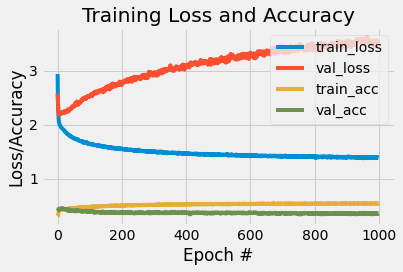

In [92]:
# plot
plot_history(history_many_to_many_complex, epochs = 1000)

In [91]:
# Fit the model (batch size 32)
history_many_to_many_complex_32 = many_to_many_model_complex.fit(xx_train, yy_train, 
                                              epochs=1000,  # Adjust the number of epochs based on training performance
                                              batch_size=32,  # Batch size
                                              validation_data=(xx_test, yy_test)  # Validation data
                                               ) 

Epoch 1/1000
52/52 [==============================] - 0s 7ms/step - loss: 1.3950 - accuracy: 0.5400 - val_loss: 3.5471 - val_accuracy: 0.3583
Epoch 2/1000
52/52 [==============================] - 0s 7ms/step - loss: 1.3820 - accuracy: 0.5405 - val_loss: 3.5842 - val_accuracy: 0.3534
Epoch 3/1000
52/52 [==============================] - 0s 6ms/step - loss: 1.3799 - accuracy: 0.5455 - val_loss: 3.5836 - val_accuracy: 0.3552
Epoch 4/1000
52/52 [==============================] - 0s 7ms/step - loss: 1.3832 - accuracy: 0.5443 - val_loss: 3.5858 - val_accuracy: 0.3571
Epoch 5/1000
52/52 [==============================] - 0s 7ms/step - loss: 1.3775 - accuracy: 0.5403 - val_loss: 3.5745 - val_accuracy: 0.3528
Epoch 6/1000
52/52 [==============================] - 0s 7ms/step - loss: 1.3737 - accuracy: 0.5465 - val_loss: 3.6101 - val_accuracy: 0.3601
Epoch 7/1000
52/52 [==============================] - 0s 7ms/step - loss: 1.3753 - accuracy: 0.5438 - val_loss: 3.5699 - val_accuracy: 0.3479
Epoch 

In [148]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_complex_model_history_bs32.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_complex_32.history, file)

In [ ]:
print_metrics_history(history_many_to_many_complex_32)

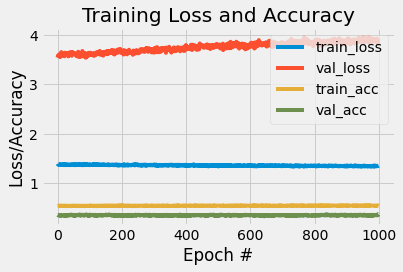

In [94]:
# plot
plot_history(history_many_to_many_complex_32, epochs = 1000)

In [95]:
# Fit the model (batch size 64)
history_many_to_many_complex_64 = many_to_many_model_complex.fit(xx_train, yy_train, 
                                              epochs=1000,  # Adjust the number of epochs based on training performance
                                              batch_size=64,  # Batch size
                                              validation_data=(xx_test, yy_test)  # Validation data
                                               ) 

Epoch 1/1000
26/26 [==============================] - 0s 10ms/step - loss: 1.3393 - accuracy: 0.5482 - val_loss: 3.8855 - val_accuracy: 0.3656
Epoch 2/1000
26/26 [==============================] - 0s 8ms/step - loss: 1.3407 - accuracy: 0.5506 - val_loss: 3.9187 - val_accuracy: 0.3540
Epoch 3/1000
26/26 [==============================] - 0s 9ms/step - loss: 1.3487 - accuracy: 0.5490 - val_loss: 3.9276 - val_accuracy: 0.3534
Epoch 4/1000
26/26 [==============================] - 0s 10ms/step - loss: 1.3437 - accuracy: 0.5473 - val_loss: 3.9328 - val_accuracy: 0.3504
Epoch 5/1000
26/26 [==============================] - 0s 9ms/step - loss: 1.3467 - accuracy: 0.5487 - val_loss: 3.9139 - val_accuracy: 0.3571
Epoch 6/1000
26/26 [==============================] - 0s 9ms/step - loss: 1.3454 - accuracy: 0.5467 - val_loss: 3.8962 - val_accuracy: 0.3510
Epoch 7/1000
26/26 [==============================] - 0s 9ms/step - loss: 1.3354 - accuracy: 0.5557 - val_loss: 3.9391 - val_accuracy: 0.3467
Epoc

In [149]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_complex_model_history_bs64.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_complex_64.history, file)

In [ ]:
print_metrics_history(history_many_to_many_complex_64)

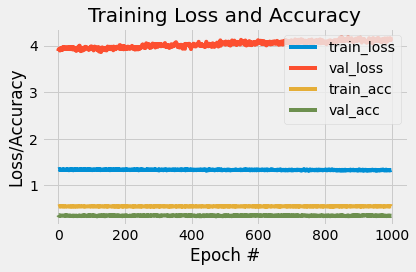

In [97]:
# plot
plot_history(history_many_to_many_complex_64, epochs = 1000)

In [98]:
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

# Predict labels on the test data
predictions = many_to_many_model_complex.predict(xx_test)

# Convert one-hot encoded predictions to single labels using TensorFlow's argmax
predicted_labels_encoded = tf.argmax(predictions, axis=-1).numpy()

# Flatten the arrays for label-wise accuracy calculation
predicted_labels_encoded = predicted_labels_encoded.flatten()

# Convert one-hot encoded true labels to single labels using TensorFlow's argmax
true_labels_encoded = tf.argmax(yy_test, axis=-1).numpy().flatten()

# Map predicted labels to original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Map true labels to original labels
true_labels = label_encoder.inverse_transform(true_labels_encoded)

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Accuracy: {overall_accuracy}')

# Display label-wise accuracy
unique_labels = label_encoder.classes_
for label in unique_labels:
    label_indices = true_labels == label
    label_accuracy = accuracy_score(true_labels[label_indices], predicted_labels[label_indices])
    print(f'Accuracy for Label {label}: {label_accuracy}')



Overall Accuracy: 0.3467153284671533
Accuracy for Label barrel_turn: 0.0
Accuracy for Label basic_charleston: nan
Accuracy for Label basic_closed: 0.42657342657342656
Accuracy for Label basic_open: 0.0
Accuracy for Label break: 0.08490566037735849
Accuracy for Label come_back: 0.024691358024691357
Accuracy for Label corridor: 0.0
Accuracy for Label frankie´s_points: nan
Accuracy for Label frankie´s_sixes: 0.04878048780487805
Accuracy for Label groove_walk: 0.0
Accuracy for Label hallelujah_rocks: 0.0
Accuracy for Label hand_to_hand: 0.0
Accuracy for Label hand_to_hand_charleston: nan
Accuracy for Label inside_spin: 0.0
Accuracy for Label inside_turn: 0.0
Accuracy for Label lindy_circle: 0.0
Accuracy for Label mini_dip: nan
Accuracy for Label outside_spin: 0.025
Accuracy for Label outside_turn: 0.041666666666666664
Accuracy for Label pass_by: 0.6523076923076923
Accuracy for Label pop_turn: 0.0
Accuracy for Label promenade: 0.0
Accuracy for Label s_turn: 0.0
Accuracy for Label sailor_kic

/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in

## Word embeddings

### Training a word2vec model for the dance move sequences


In [19]:
import gensim
from gensim.models import Word2Vec

In [100]:
lists_extracted

[['groove_walk',
  'swingout',
  'swingout',
  'swingout',
  'lindy_circle',
  'basic_closed',
  'tuck_turn',
  'pass_by',
  'come_back',
  'basic_closed',
  'swingout',
  'swingout',
  'swingout',
  'swingout',
  'pass_by',
  'pass_by',
  'sugar_push',
  'pass_by',
  'come_back',
  'swingout',
  'swingout',
  'swingout',
  'swingout',
  'come_back',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'outside_spin',
  'pass_by',
  'come_back',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'sugar_push',
  'pass_by',
  'outside_spin',
  'come_back',
  'swingout',
  'lindy_circle',
  'tuck_turn',
  'pass_by',
  'swingout',
  'swingout',
  'swingout',
  'swingout',
  'lindy_circle',
  'basic_closed',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'sugar_push',
  'come_back',
  'tuck_turn',
  'pass_by',
  'sugar_push',
  'pass_by',
  'outside_spin',
  'come_back',
  'basic_closed',
  'swingout',
  'swingout',
  'swingout'],
 ['groove_walk',
  'swingout',
  'swingout',
  'swingout',
  'lindy_circle',
  'ba

In [101]:
# Train the Word2Vec model
word2vec_model = Word2Vec(lists_extracted, vector_size=100, window=3, min_count=1, workers=4)

# Save the model for later use
word2vec_model.save("lindyhop_moves_word2vec.model")

In [102]:
word2vec_model

In [103]:
# Get an embedding for a specific move
move_vector = word2vec_model.wv['lindy_circle'] 
print(move_vector)

[-0.04565154  0.09230679  0.08688464  0.13637583 -0.01513857 -0.06920461
  0.14715016  0.19098045 -0.15600672 -0.13825713  0.09050777 -0.09743053
  0.00868952  0.07922212  0.02120247 -0.04458927  0.16966315  0.05521603
 -0.12658231 -0.2715543   0.05603347  0.00378757  0.24885255 -0.01874815
 -0.0306618   0.06091048 -0.08870434  0.05766023 -0.07050441  0.04014183
  0.11143244 -0.07308721  0.05842291 -0.12233337 -0.04683715  0.08301029
  0.07930008 -0.02897829 -0.0821113  -0.05149851  0.09115343 -0.06452671
 -0.09981759  0.04327979  0.04943946 -0.01031253 -0.10547889 -0.0618293
  0.02623595  0.03843953  0.0053837  -0.12939256 -0.07783518 -0.03112757
 -0.09670492 -0.03992368  0.0512801  -0.08999103 -0.03384485 -0.00890474
 -0.04040616 -0.06004788  0.1674135  -0.02685238 -0.09943943  0.17649834
 -0.00323685  0.12997423 -0.15348533 -0.0127951   0.02286167  0.15707497
  0.06567636  0.09023935  0.08001017  0.00049106  0.06410327  0.08265287
 -0.05962176 -0.0765774  -0.137158   -0.04845566  0.

In [104]:
# Finding moves similar to a given move (it can be interpreted that those moves co-occured more often in the dataset)
similar_moves = word2vec_model.wv.most_similar('lindy_circle', topn=5) 
for move, similarity in similar_moves:
    print(f"{move}: {similarity}")

pass_by: 0.9978436231613159
come_back: 0.9974063038825989
basic_closed: 0.9973371028900146
tuck_turn: 0.9970701932907104
break: 0.9968063831329346


In [105]:
# Check vocabulary of Word2Vec model
for move in word2vec_model.wv.key_to_index:
    print(move)

pass_by
swingout
come_back
tuck_turn
basic_closed
break
lindy_circle
sugar_push
outside_spin
sweetheart
send_out
groove_walk
frankie´s_sixes
barrel_turn
inside_turn
promenade
outside_turn
corridor
basic_open
switches
inside_spin
hand_to_hand
sailor_kicks
sling_shot
pop_turn
mini_dip
hallelujah_rocks
tandem
hand_to_hand_charleston
basic_charleston
frankie´s_points
s_turn


In [106]:
# model parameters
print(word2vec_model)

Word2Vec<vocab=32, vector_size=100, alpha=0.025>


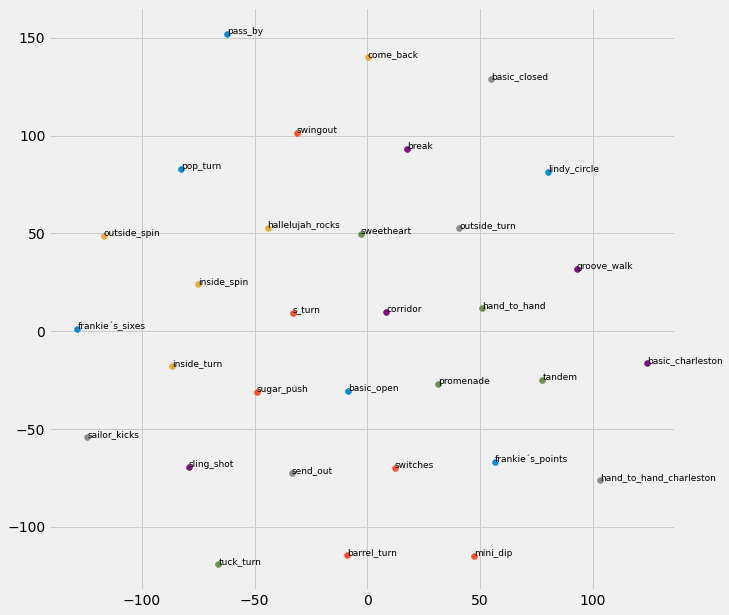

In [107]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Retrieve all vectors from the model
vectors = word2vec_model.wv.vectors

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
vectors_2d = tsne.fit_transform(vectors)

# Plotting
plt.figure(figsize=(10, 10))
for i, move in enumerate(word2vec_model.wv.key_to_index):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.text(vectors_2d[i, 0]+0.03, vectors_2d[i, 1]+0.03, move, fontsize=9)
plt.show()

#### Create an embedding matrix for use in LSTM

In [32]:
# Flatten all sequences into a single list to find unique moves
all_moves = [move for sequence in lists_extracted for move in sequence]

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(all_moves)

# Number of unique classes (moves)
num_classes = len(label_encoder.classes_)

# Function to convert moves to integers
def encode_sequence(sequence):
    # Encode the sequence
    return label_encoder.transform(sequence)

# Apply encoding to each sequence
encoded_sequences = [encode_sequence(sequence) for sequence in lists_extracted]
encoded_sequences



[array([ 9, 28, 28, 28, 15,  2, 31, 19,  5,  2, 28, 28, 28, 28, 19, 19, 26,
        19,  5, 28, 28, 28, 28,  5, 31, 19, 19, 17, 19,  5, 31, 19, 19, 26,
        19, 17,  5, 28, 15, 31, 19, 28, 28, 28, 28, 15,  2, 31, 19, 19, 26,
         5, 31, 19, 26, 19, 17,  5,  2, 28, 28, 28]),
 array([ 9, 28, 28, 28, 15,  2, 31, 19, 15, 24, 19, 17,  5, 28, 28, 28, 28,
        15,  2, 31, 19, 19, 19, 19, 19,  3, 28, 28, 28, 28, 28, 15,  2, 31,
        19, 19, 19, 17,  6, 28, 28, 28, 28, 28, 15, 31, 19, 19, 19, 19, 19,
        28, 28, 28,  5,  2, 24, 28, 28, 28]),
 array([ 9, 28, 19, 19,  5, 31,  2, 31, 19, 28, 28,  5, 31, 19, 19, 28, 28,
        28, 15, 31, 19, 17, 19, 19, 19, 27, 19, 26, 19,  5, 31, 19, 19, 28,
        28, 28, 15,  2, 31, 19, 17,  5,  2,  2, 31, 19, 26, 19]),
 array([28, 28, 28, 28, 15, 31, 19,  5, 28, 28, 28, 15, 31, 19, 17,  5,  2,
        31, 19, 26, 27, 19, 19, 26,  3, 28, 28, 28, 28, 15, 31, 19, 17, 26,
        27, 19, 26, 19, 19,  5, 31, 19, 28, 28, 15, 31, 19, 19, 26, 27, 19

In [33]:
# Create a mapping from moves to indices using the LabelEncoder
move_to_index = {move: index for index, move in enumerate(label_encoder.classes_)}

# Print the mapping
print(move_to_index)

{'barrel_turn': 0, 'basic_charleston': 1, 'basic_closed': 2, 'basic_open': 3, 'break': 4, 'come_back': 5, 'corridor': 6, 'frankie´s_points': 7, 'frankie´s_sixes': 8, 'groove_walk': 9, 'hallelujah_rocks': 10, 'hand_to_hand': 11, 'hand_to_hand_charleston': 12, 'inside_spin': 13, 'inside_turn': 14, 'lindy_circle': 15, 'mini_dip': 16, 'outside_spin': 17, 'outside_turn': 18, 'pass_by': 19, 'pop_turn': 20, 'promenade': 21, 's_turn': 22, 'sailor_kicks': 23, 'send_out': 24, 'sling_shot': 25, 'sugar_push': 26, 'sweetheart': 27, 'swingout': 28, 'switches': 29, 'tandem': 30, 'tuck_turn': 31}


In [110]:
import numpy as np
# Create embedding matrix

# Assuming 'move_to_index' is your mapping from move names to indices
embedding_matrix = np.zeros((len(move_to_index), 100))  # 100 is the vector_size

for move, i in move_to_index.items():
    if move in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[move]

In [111]:
embedding_matrix

array([[-0.04542539,  0.07414072,  0.05057511, ..., -0.06139921,
         0.00665566,  0.05288935],
       [-0.0075555 , -0.00329107,  0.00354963, ..., -0.01305514,
        -0.00455797,  0.00511153],
       [-0.08580953,  0.1426644 ,  0.12035948, ..., -0.1230483 ,
         0.02897234,  0.09621964],
       ...,
       [-0.01748785,  0.04731126,  0.03965464, ..., -0.0301785 ,
         0.01392032,  0.03688603],
       [-0.00843198,  0.02499254,  0.01546631, ..., -0.01299354,
        -0.00415079,  0.00867285],
       [-0.07613422,  0.13139595,  0.11004833, ..., -0.11785343,
         0.02172278,  0.07516012]])

In [125]:
# save embedding_matrix
np.save('embedding_matrix_word2vec_100.npy', embedding_matrix)



In [20]:
# load embedding_matrix
loaded_embedding_matrix = np.load('embedding_matrix_word2vec_100.npy')

#### Prepare input-output pairs for LSTM

In [21]:
x_emb, y_emb = create_input_output_pairs_mtm(encoded_sequences, 4)

In [22]:
# Convert an input to Numpy Array
x_emb = np.array(x_emb)

In [23]:
# Convert an output to a one-hot-encoded vector
y_emb_one_hot = to_categorical(y_emb, num_classes=num_classes)

In [24]:
# Splitting the data into training and testing sets (80-20 split)
split_index_2 = int(0.8 * len(x_emb))
x_emb_train, x_emb_test = x_emb[:split_index_2], x_emb[split_index_2:]
y_emb_train, y_emb_test = y_emb_one_hot[:split_index_2], y_emb_one_hot[split_index_2:]

# Check shapes
print("Shape of x_emb_train:", x_emb_train.shape)
print("Shape of y_emb_train:", y_emb_train.shape)

Shape of x_emb_train: (1644, 4)
Shape of y_emb_train: (1644, 4, 32)


### Baseline LSTM with trained word2vec embeddings

In [25]:
# load embedding matrix
embedding_matrix = np.load('embedding_matrix_word2vec_100.npy')

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, TimeDistributed, Dense, Embedding
import random

# Set the random seed
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Parameters
input_length = 4  # Length of input sequences
num_moves = len(embedding_matrix)  # Number of unique moves
embedding_dim = len(embedding_matrix[0])  # Dimension of Word2Vec embeddings

# Define the LSTM model with the Embedding layer
Emb_model_simple = Sequential([
    # Embedding layer with pre-trained Word2Vec weights
    Embedding(input_dim=num_moves, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False, 
              input_length=input_length),
    
    # LSTM layer
    LSTM(64, return_sequences=True),
    
    # Dropout for regularization
    Dropout(0.2),

    # TimeDistributed Dense layer for output at each time step
    TimeDistributed(Dense(num_moves, activation='softmax'))  # Assuming output size equals the number of moves
])

# Compile the model
Emb_model_simple.compile(optimizer='adam', 
                           loss='categorical_crossentropy', 
                           metrics=['accuracy'])

# Summary of the model
Emb_model_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            3200      
_________________________________________________________________
lstm (LSTM)                  (None, 4, 64)             42240     
_________________________________________________________________
dropout (Dropout)            (None, 4, 64)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 4, 32)             2080      
Total params: 47,520
Trainable params: 44,320
Non-trainable params: 3,200
_________________________________________________________________


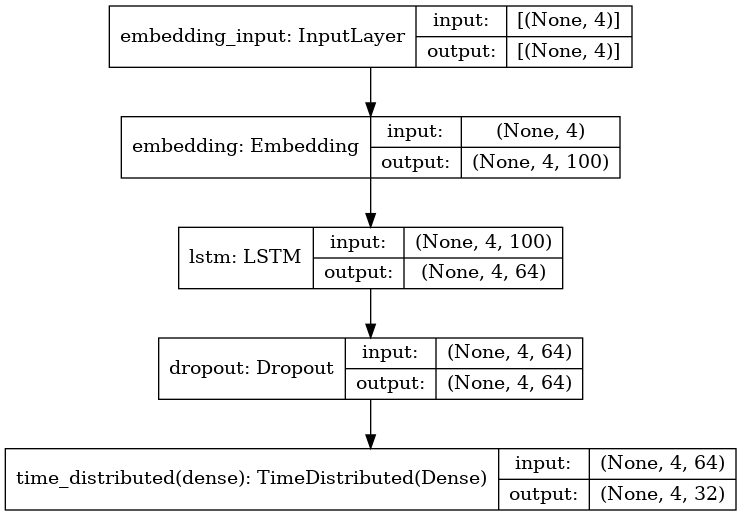

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(Emb_model_simple, to_file='Emb_model_simple_architecture.png', show_shapes=True, show_layer_names=True)


In [27]:
# Fitting the model (batch size 16)
history_emb_simple = Emb_model_simple.fit(x_emb_train, y_emb_train,
                                 epochs=1000,
                                 batch_size=16,
                                 validation_data=(x_emb_test, y_emb_test)
                                 )

Epoch 1/1000
103/103 [==============================] - 2s 8ms/step - loss: 3.0502 - accuracy: 0.2559 - val_loss: 2.5324 - val_accuracy: 0.3954
Epoch 2/1000
103/103 [==============================] - 1s 5ms/step - loss: 2.5052 - accuracy: 0.3097 - val_loss: 2.4899 - val_accuracy: 0.3954
Epoch 3/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.4765 - accuracy: 0.3033 - val_loss: 2.4349 - val_accuracy: 0.3954
Epoch 4/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.4280 - accuracy: 0.3097 - val_loss: 2.4332 - val_accuracy: 0.3954
Epoch 5/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.4244 - accuracy: 0.3049 - val_loss: 2.4313 - val_accuracy: 0.3954
Epoch 6/1000
103/103 [==============================] - 0s 5ms/step - loss: 2.4052 - accuracy: 0.3111 - val_loss: 2.4312 - val_accuracy: 0.3954
Epoch 7/1000
103/103 [==============================] - 0s 4ms/step - loss: 2.3894 - accuracy: 0.3190 - val_loss: 2.4265 - val_accuracy:

In [139]:
# Save the model
model_file_emb_simple = "many_to_many_LSTM_Emb_baseline_model.h5"  
Emb_model_simple.save(model_file_emb_simple)

In [28]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_Emb_baseline_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_emb_simple.history, file)

In [29]:
# Extract and print metrics
def print_metrics(history):
    val_accuracy_per_epoch = history.history['val_accuracy']
    train_accuracy_per_epoch = history.history['accuracy']
    train_loss_per_epoch = history.history['loss']
    val_loss_per_epoch = history.history['val_loss']

    best_epoch_val_accuracy = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch)) + 1
    best_epoch_train_accuracy = train_accuracy_per_epoch.index(max(train_accuracy_per_epoch)) + 1
    best_epoch_train_loss = train_loss_per_epoch.index(min(train_loss_per_epoch)) + 1
    best_epoch_val_loss = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1

    print(f"Best Epoch for Validation Accuracy: {best_epoch_val_accuracy} (Val Accuracy: {max(val_accuracy_per_epoch)})")
    print(f"Best Epoch for Training Accuracy: {best_epoch_train_accuracy} (Train Accuracy: {max(train_accuracy_per_epoch)})")
    print(f"Best Epoch for Training Loss: {best_epoch_train_loss} (Train Loss: {min(train_loss_per_epoch)})")
    print(f"Best Epoch for Validation Loss: {best_epoch_val_loss} (Val Loss: {min(val_loss_per_epoch)})")
    print("\nOverall Best Performance Metrics:")
    print(f"Maximum Validation Accuracy: {max(val_accuracy_per_epoch)}")
    print(f"Maximum Training Accuracy: {max(train_accuracy_per_epoch)}")
    print(f"Minimum Training Loss: {min(train_loss_per_epoch)}")
    print(f"Minimum Validation Loss: {min(val_loss_per_epoch)}")


In [30]:
print_metrics(history_emb_simple)

Best Epoch for Validation Accuracy: 112 (Val Accuracy: 0.4513382017612457)
Best Epoch for Training Accuracy: 959 (Train Accuracy: 0.5409063100814819)
Best Epoch for Training Loss: 993 (Train Loss: 1.4032548666000366)
Best Epoch for Validation Loss: 60 (Val Loss: 2.2048439979553223)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.4513382017612457
Maximum Training Accuracy: 0.5409063100814819
Minimum Training Loss: 1.4032548666000366
Minimum Validation Loss: 2.2048439979553223


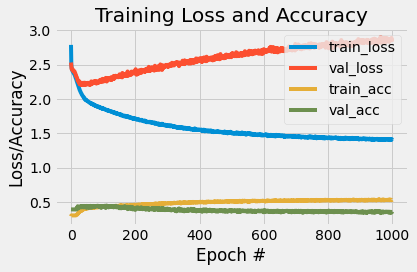

In [31]:
# plot
plot_history(history_emb_simple, epochs = 1000)

In [35]:
from sklearn.metrics import classification_report

# Predict classes on the test set
yy_pred = Emb_model_simple.predict(x_emb_test)

# Convert predictions from one-hot encoded back to label indices
yy_pred_classes = np.argmax(yy_pred, axis=-1)
yy_true_classes = np.argmax(y_emb_test, axis=-1)

# Convert numeric classes to actual labels
yy_pred_labels = [class_labels[i] for i in yy_pred_classes.flatten()]
yy_true_labels = [class_labels[i] for i in yy_true_classes.flatten()]

# Generate a confusion matrix
#conf_matrix = confusion_matrix(yy_true_classes.flatten(), yy_pred_classes.flatten())

# Calculate precision, recall, and F1-score for each class
class_report = classification_report(yy_true_labels, yy_pred_labels, zero_division=0)
print(class_report)

# Write the string to a text file
with open('LSTM_classifier_report_baseline-LSTM-embedding-layer.txt', 'w') as file:
    file.write(class_report)


                  precision    recall  f1-score   support

     barrel_turn       0.00      0.00      0.00        36
    basic_closed       0.63      0.45      0.53       143
      basic_open       0.00      0.00      0.00        18
           break       0.22      0.08      0.12       106
       come_back       0.03      0.02      0.03        81
        corridor       0.00      0.00      0.00        11
 frankie´s_sixes       0.17      0.02      0.04        41
     groove_walk       0.00      0.00      0.00        10
hallelujah_rocks       0.00      0.00      0.00         4
    hand_to_hand       0.00      0.00      0.00         8
     inside_spin       0.00      0.00      0.00         4
     inside_turn       0.00      0.00      0.00        35
    lindy_circle       0.00      0.00      0.00         4
    outside_spin       0.00      0.00      0.00        40
    outside_turn       0.00      0.00      0.00        24
         pass_by       0.46      0.71      0.56       650
        pop_t

In [126]:
## Fitting the model (batch size 32)
history_emb_simple_32 = Emb_model_simple.fit(x_emb_train, y_emb_train,
                                 epochs=1000,
                                 batch_size=32,
                                 validation_data=(x_emb_test, y_emb_test)
                                 )

Epoch 1/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.3957 - accuracy: 0.5363 - val_loss: 2.8607 - val_accuracy: 0.3619
Epoch 2/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.4053 - accuracy: 0.5318 - val_loss: 2.8754 - val_accuracy: 0.3534
Epoch 3/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.3981 - accuracy: 0.5443 - val_loss: 2.8518 - val_accuracy: 0.3656
Epoch 4/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.3960 - accuracy: 0.5371 - val_loss: 2.8636 - val_accuracy: 0.3601
Epoch 5/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.3961 - accuracy: 0.5366 - val_loss: 2.8700 - val_accuracy: 0.3601
Epoch 6/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.3891 - accuracy: 0.5351 - val_loss: 2.8749 - val_accuracy: 0.3583
Epoch 7/1000
52/52 [==============================] - 0s 5ms/step - loss: 1.3947 - accuracy: 0.5376 - val_loss: 2.8745 - val_accuracy: 0.3589
Epoch 

In [151]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_Emb_baseline_model_history_bs32.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_emb_simple_32.history, file)

In [128]:
print_metrics(history_emb_simple_32)

Best Epoch for Validation Accuracy: 69 (Val Accuracy: 0.3759123980998993)
Best Epoch for Training Accuracy: 877 (Train Accuracy: 0.5527676343917847)
Best Epoch for Training Loss: 981 (Train Loss: 1.3400225639343262)
Best Epoch for Validation Loss: 69 (Val Loss: 2.8436222076416016)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.3759123980998993
Maximum Training Accuracy: 0.5527676343917847
Minimum Training Loss: 1.3400225639343262
Minimum Validation Loss: 2.8436222076416016


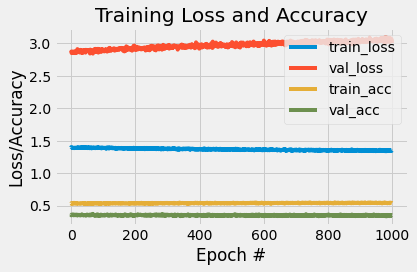

In [129]:
# plot
plot_history(history_emb_simple_32, epochs = 1000)

In [130]:
## Fitting the model (batch size 64)
history_emb_simple_64 = Emb_model_simple.fit(x_emb_train, y_emb_train,
                                 epochs=1000,
                                 batch_size=64,
                                 validation_data=(x_emb_test, y_emb_test)
                                 )

Epoch 1/1000
26/26 [==============================] - 0s 8ms/step - loss: 1.3448 - accuracy: 0.5496 - val_loss: 3.0523 - val_accuracy: 0.3540
Epoch 2/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.3386 - accuracy: 0.5470 - val_loss: 3.0824 - val_accuracy: 0.3455
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.3289 - accuracy: 0.5531 - val_loss: 3.0635 - val_accuracy: 0.3540
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.3328 - accuracy: 0.5456 - val_loss: 3.0622 - val_accuracy: 0.3528
Epoch 5/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.3396 - accuracy: 0.5465 - val_loss: 3.0565 - val_accuracy: 0.3491
Epoch 6/1000
26/26 [==============================] - 0s 7ms/step - loss: 1.3381 - accuracy: 0.5502 - val_loss: 3.0518 - val_accuracy: 0.3583
Epoch 7/1000
26/26 [==============================] - 0s 6ms/step - loss: 1.3348 - accuracy: 0.5471 - val_loss: 3.0713 - val_accuracy: 0.3431
Epoch 

In [152]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_Emb_baseline_model_history_bs64.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_emb_simple_64.history, file)

In [131]:
print_metrics(history_emb_simple_64)

Best Epoch for Validation Accuracy: 552 (Val Accuracy: 0.36618006229400635)
Best Epoch for Training Accuracy: 448 (Train Accuracy: 0.5582420825958252)
Best Epoch for Training Loss: 967 (Train Loss: 1.3104995489120483)
Best Epoch for Validation Loss: 8 (Val Loss: 3.0324811935424805)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.36618006229400635
Maximum Training Accuracy: 0.5582420825958252
Minimum Training Loss: 1.3104995489120483
Minimum Validation Loss: 3.0324811935424805


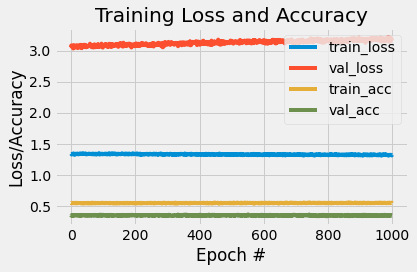

In [132]:
# plot
plot_history(history_emb_simple_64, epochs = 1000)

### A more complex LSTM with word2vec embeddings

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, TimeDistributed
from tensorflow.keras.regularizers import l1_l2

# Set the random seed
seed_value = 77
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Parameters
input_length = 4  # Length of input sequences
num_moves = len(embedding_matrix)  # Number of unique moves
embedding_dim = len(embedding_matrix[0])  # Dimension of Word2Vec embeddings


# Define the LSTM model with an Embedding layer
Emb_model_complex = Sequential([
    # Embedding layer with pre-trained Word2Vec weights
    Embedding(input_dim=num_moves, output_dim=embedding_dim,  weights=[embedding_matrix], trainable=False, 
              input_length=input_length),

    # First LSTM layer
    LSTM(64, return_sequences=True),
    Dropout(0.4),

    # Second LSTM layer
    LSTM(32, return_sequences=True),
    Dropout(0.4),

    # Dense layer
    TimeDistributed(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),

    # Output layer
    TimeDistributed(Dense(32, activation='softmax'))  
])

# Compile the model
Emb_model_complex.compile(optimizer='adam', 
                                   loss='categorical_crossentropy', 
                                   metrics=['accuracy'])

# Summary of the model
Emb_model_complex.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            3200      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 64)             42240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 32)             12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 64)             2112      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 32)            

In [40]:
## Fitting the model (batch size 16)
history_emb_complex = Emb_model_complex.fit(x_emb_train, y_emb_train,
                                 epochs=1000,
                                 batch_size=16,
                                 validation_data=(x_emb_test, y_emb_test)
                                 )

Epoch 1/1000
103/103 [==============================] - 4s 13ms/step - loss: 3.1370 - accuracy: 0.2415 - val_loss: 2.5007 - val_accuracy: 0.3954
Epoch 2/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4933 - accuracy: 0.3074 - val_loss: 2.4726 - val_accuracy: 0.3954
Epoch 3/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4608 - accuracy: 0.3032 - val_loss: 2.4577 - val_accuracy: 0.3954
Epoch 4/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4315 - accuracy: 0.3148 - val_loss: 2.4614 - val_accuracy: 0.3954
Epoch 5/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4294 - accuracy: 0.3047 - val_loss: 2.4512 - val_accuracy: 0.3954
Epoch 6/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4250 - accuracy: 0.3106 - val_loss: 2.4545 - val_accuracy: 0.3954
Epoch 7/1000
103/103 [==============================] - 1s 6ms/step - loss: 2.4090 - accuracy: 0.3029 - val_loss: 2.4307 - val_accuracy

In [39]:
# Save the model
model_file_emb_complex = "many_to_many_LSTM_Emb_complex_model.h5"  
Emb_model_complex.save(model_file_emb_complex)

In [40]:
import pickle

# Save the training history
history_file = "many_to_many_LSTM_Emb_complex_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_emb_complex.history, file)

In [41]:
print_metrics(history_emb_complex)

Best Epoch for Validation Accuracy: 36 (Val Accuracy: 0.4604623019695282)
Best Epoch for Training Accuracy: 994 (Train Accuracy: 0.49011558294296265)
Best Epoch for Training Loss: 968 (Train Loss: 1.5816971063613892)
Best Epoch for Validation Loss: 33 (Val Loss: 2.185821056365967)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.4604623019695282
Maximum Training Accuracy: 0.49011558294296265
Minimum Training Loss: 1.5816971063613892
Minimum Validation Loss: 2.185821056365967


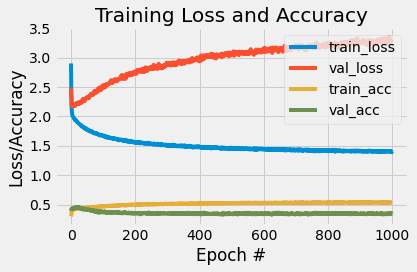

In [136]:
# plot
plot_history(history_emb_complex, epochs = 1000)

In [142]:
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

# Predict labels on the test data
predictions = Emb_model_complex.predict(x_emb_test)

# Convert one-hot encoded predictions to single labels using TensorFlow's argmax
predicted_labels_encoded = tf.argmax(predictions, axis=-1).numpy()

# Flatten the arrays for label-wise accuracy calculation
predicted_labels_encoded = predicted_labels_encoded.flatten()

# Convert one-hot encoded true labels to single labels using TensorFlow's argmax
true_labels_encoded = tf.argmax(yy_test, axis=-1).numpy().flatten()

# Map predicted labels to original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Map true labels to original labels
true_labels = label_encoder.inverse_transform(true_labels_encoded)

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Accuracy: {overall_accuracy}')

# Display label-wise accuracy
unique_labels = label_encoder.classes_
for label in unique_labels:
    label_indices = true_labels == label
    label_accuracy = accuracy_score(true_labels[label_indices], predicted_labels[label_indices])
    print(f'Accuracy for Label {label}: {label_accuracy}')


Overall Accuracy: 0.3467153284671533
Accuracy for Label barrel_turn: 0.0
Accuracy for Label basic_charleston: nan
Accuracy for Label basic_closed: 0.40559440559440557
Accuracy for Label basic_open: 0.0
Accuracy for Label break: 0.09433962264150944
Accuracy for Label come_back: 0.0
Accuracy for Label corridor: 0.0
Accuracy for Label frankie´s_points: nan
Accuracy for Label frankie´s_sixes: 0.07317073170731707
Accuracy for Label groove_walk: 0.0
Accuracy for Label hallelujah_rocks: 0.0
Accuracy for Label hand_to_hand: 0.0
Accuracy for Label hand_to_hand_charleston: nan
Accuracy for Label inside_spin: 0.0
Accuracy for Label inside_turn: 0.0
Accuracy for Label lindy_circle: 0.0
Accuracy for Label mini_dip: nan
Accuracy for Label outside_spin: 0.025
Accuracy for Label outside_turn: 0.0
Accuracy for Label pass_by: 0.6753846153846154
Accuracy for Label pop_turn: 0.0
Accuracy for Label promenade: 0.08333333333333333
Accuracy for Label s_turn: 0.0
Accuracy for Label sailor_kicks: 0.0
Accuracy f

/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in

## Data augmentation

### Markov Chains: generating new sequences based on the transition probabilities observed in the original data

#### Get transition probabilities between moves

In [154]:
import numpy as np
from collections import defaultdict

# Original sequences of dance moves
lists_extracted

# Train a Markov Chain
transition_counts = defaultdict(lambda: defaultdict(int))

for sequence in lists_extracted:
    for i in range(len(sequence) - 1):
        current_move = sequence[i]
        next_move = sequence[i + 1]
        transition_counts[current_move][next_move] += 1

# Convert counts to probabilities
transition_probabilities = defaultdict(dict)
for current_move, next_moves in transition_counts.items():
    total = sum(next_moves.values())
    for next_move, count in next_moves.items():
        transition_probabilities[current_move][next_move] = count / total


In [155]:
transition_probabilities

defaultdict(dict,
            {'groove_walk': {'swingout': 0.16326530612244897,
              'basic_closed': 0.22448979591836735,
              'come_back': 0.08163265306122448,
              'lindy_circle': 0.04081632653061224,
              'break': 0.061224489795918366,
              'tuck_turn': 0.1836734693877551,
              'pass_by': 0.14285714285714285,
              'inside_spin': 0.02040816326530612,
              'corridor': 0.02040816326530612,
              'sweetheart': 0.02040816326530612,
              'send_out': 0.02040816326530612,
              'sugar_push': 0.02040816326530612},
             'swingout': {'swingout': 0.4216417910447761,
              'lindy_circle': 0.1455223880597015,
              'pass_by': 0.21641791044776118,
              'come_back': 0.06343283582089553,
              'switches': 0.018656716417910446,
              'frankie´s_points': 0.0037313432835820895,
              'sugar_push': 0.007462686567164179,
              'tuck_turn': 0.003

#### Generate new sequences

#### Generate 41 new dance sequences

A function with some restrictions is created to augment the dance sequences data

#### Generating sequences with restrictive rules

In [156]:
# Example of repetition rules

# Moves that can only be repeated once
repeat_once_moves= {'come_back', 'frankie´s_sixes', 'hand_to_hand', 'hand_to_hand_charleston', 'mini_dip', 's_turn', 'send_out', 'tuck_turn', 'switches', 'sweetheart', 'pop_turn', 'corridor', 'break'}  
# Maximum repeats for all other moves
max_repeats = 2

In [157]:
# Moves that should not be followed by specific moves
restricted_combinations = {
    'sugar_push': {'tuck_turn'},
    'pass_by': {'tuck_turn'}
}


In [158]:
def generate_sequence(start_move, min_length, max_length, transition_probabilities, repeat_once_moves, max_repeats=2):
    sequence_length = random.randint(min_length, max_length)
    sequence = [start_move]
    current_move = start_move
    move_counts = {current_move: 1}

    for _ in range(sequence_length - 1):
        next_moves = transition_probabilities.get(current_move, {})

        # Apply repetition and combination rules
        next_moves_filtered = {}
        total_prob = 0
        for move, prob in next_moves.items():
            count = move_counts.get(move, 0)
            valid_for_repetition = (move in repeat_once_moves and count < 1) or (move not in repeat_once_moves and count < max_repeats)
            valid_for_combination = move not in restricted_combinations.get(current_move, {})
            if valid_for_repetition and valid_for_combination:
                next_moves_filtered[move] = prob
                total_prob += prob

        # Adjusting rules for min_length
        if not next_moves_filtered and len(sequence) < min_length:
            next_moves_filtered = {move: prob for move, prob in next_moves.items() if move_counts.get(move, 0) < max_repeats}
            total_prob = sum(next_moves_filtered.values())

        # Re-normalize probabilities
        if total_prob > 0:
            for move in next_moves_filtered:
                next_moves_filtered[move] /= total_prob
        else:
            break

        # Select the next move
        if next_moves_filtered:
            next_move = np.random.choice(list(next_moves_filtered.keys()), p=list(next_moves_filtered.values()))
            sequence.append(next_move)
            move_counts[next_move] = move_counts.get(next_move, 0) + 1
            current_move = next_move
        else:
            break

    return sequence


In [159]:
# Generate sequences
generated_sequences = []
for _ in range(41):
    start_move = random.choice(list(transition_probabilities.keys()))
    new_sequence = generate_sequence(start_move, 40, 55, transition_probabilities, repeat_once_moves)
    generated_sequences.append(new_sequence)

# Print the sequences
for i, seq in enumerate(generated_sequences):
    print(f"Sequence {i+1}: {seq}")


Sequence 1: ['switches', 'lindy_circle', 'send_out', 'break', 'pass_by', 'come_back', 'tuck_turn', 'pass_by', 'lindy_circle', 'basic_closed', 'basic_closed', 'swingout', 'swingout', 'inside_turn', 'inside_turn', 'sugar_push', 'sweetheart', 'outside_spin', 'outside_spin', 'corridor', 'hand_to_hand_charleston', 'frankie´s_sixes', 'hallelujah_rocks', 'come_back', 'groove_walk', 'inside_spin', 'outside_turn', 'sugar_push', 'sailor_kicks', 'barrel_turn', 'outside_turn', 'sweetheart', 'barrel_turn', 'break', 'promenade', 'groove_walk', 'inside_spin']
Sequence 2: ['sweetheart', 'pass_by', 'come_back', 'basic_closed', 'swingout', 'swingout', 'corridor', 'pass_by', 'outside_spin', 'frankie´s_sixes', 'break', 'lindy_circle', 'tuck_turn', 'outside_spin', 'lindy_circle', 'promenade', 'groove_walk', 'basic_closed', 'groove_walk', 'sugar_push', 'sugar_push', 's_turn', 'tandem', 'tandem', 'break', 'send_out', 'sailor_kicks', 'barrel_turn', 'outside_turn', 'sweetheart', 'barrel_turn', 'outside_turn']


In [205]:
generated_sequences[40]

# sequence 7 had an improbable move combination, sequene 35 was very short

['sailor_kicks',
 'pass_by',
 'swingout',
 'swingout',
 'lindy_circle',
 'tuck_turn',
 'sugar_push',
 'sweetheart',
 'pass_by',
 'barrel_turn',
 'come_back',
 'promenade',
 'groove_walk',
 'corridor',
 'basic_closed',
 'basic_closed',
 'send_out',
 'outside_spin',
 'outside_spin',
 'lindy_circle',
 'pop_turn',
 'frankie´s_sixes',
 'hallelujah_rocks',
 'break',
 'barrel_turn',
 'outside_turn',
 'sugar_push',
 'inside_turn',
 'inside_turn',
 'hand_to_hand']

In [206]:
# Remove above mentiones sequences

# Indices of sequences to remove
indices_to_remove = [7, 35]

# Filter out sequences
filtered_sequences = [seq for i, seq in enumerate(generated_sequences) if i not in indices_to_remove]


In [208]:
# generate 2 extra seq

add_generated_sequences = []
for _ in range(2):
    start_move = random.choice(list(transition_probabilities.keys()))
    new_sequence = generate_sequence(start_move, 40, 55, transition_probabilities, repeat_once_moves)
    add_generated_sequences.append(new_sequence)


In [210]:
add_generated_sequences[1]

['come_back',
 'basic_closed',
 'send_out',
 'pass_by',
 'pass_by',
 'outside_spin',
 'barrel_turn',
 'sweetheart',
 'lindy_circle',
 'tuck_turn',
 'frankie´s_sixes',
 'lindy_circle',
 'break',
 'outside_turn',
 'sugar_push',
 'sugar_push',
 'outside_spin',
 'barrel_turn',
 'outside_turn',
 'basic_closed',
 'groove_walk',
 'swingout',
 'swingout',
 'switches',
 'come_back',
 'groove_walk',
 'corridor',
 'hand_to_hand_charleston',
 'frankie´s_sixes',
 'hallelujah_rocks',
 'break',
 'promenade',
 'promenade',
 'tuck_turn',
 'inside_turn',
 'inside_turn',
 'hand_to_hand']

In [211]:
# Combine all augmented sequences
all_augmented_sequences = filtered_sequences + add_generated_sequences

# Filter out 16 sequences from original dataset for the validation set (total 81 seq. so 20% is set asside for the test) 
original_sequences_val = lists_extracted[-16:]
# the rest of the original dataset to be used for training
original_sequences_train = lists_extracted[:-16]

# Combine sequences for the training
all_sequences_train = original_sequences_train + all_augmented_sequences

In [216]:
# Combine all sequences for embedding matrix
all_sequences = all_augmented_sequences + lists_extracted

In [217]:
len(all_sequences)

82

In [218]:
import csv

# Saving all_augmented_sequences sequences
with open('all_augmented_sequences.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(all_augmented_sequences)

    
# Saving original_sequences_val sequences
with open('original_sequences_val.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(original_sequences_val)
    
# Saving all_sequences_train sequences
with open('all_sequences_train.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(all_sequences_train)    

# Saving all augmet sequences merged with all original
with open('all_sequences_augmented_original.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(all_sequences)   
    

## Modeling after data augmentation

### Word embeddings

#### Training a word2vec model for the dance move sequences

In [219]:
# Train the Word2Vec model
word2vec_model_augmented = Word2Vec(all_sequences, vector_size=100, window=3, min_count=1, workers=4)

# Save the model for later use
word2vec_model_augmented.save("lindyhop_moves_word2vec_augmented.model")


In [220]:
word2vec_model_augmented

In [222]:
# Get an embedding for a specific move
move_vector_augmented = word2vec_model_augmented.wv['lindy_circle'] 
print(move_vector_augmented)



[ 7.64474273e-03  1.60651237e-01  1.63596690e-01  6.40599355e-02
 -1.26433093e-02 -1.47748232e-01  9.99437422e-02  3.89276385e-01
 -2.24339843e-01 -2.67740995e-01 -2.76259612e-02 -2.32979059e-01
  2.39891186e-02  3.83976772e-02 -7.56487064e-03 -3.97672504e-02
  2.67559856e-01 -9.58606321e-03 -1.56874746e-01 -6.10023081e-01
  3.95981222e-02  4.97586317e-02  2.10622847e-01 -6.62096143e-02
 -2.44502932e-01  1.13610499e-01 -2.54685998e-01  5.09284399e-02
 -6.42005056e-02  1.56850070e-01  2.16609493e-01 -1.96707547e-01
  3.32984515e-02 -2.65461326e-01 -6.53318241e-02  1.44481957e-01
  1.69076487e-01  7.89705813e-02 -1.64456934e-01 -1.05010755e-01
  1.41897291e-01 -1.89162835e-01 -1.59927338e-01  2.55636126e-01
  5.03181405e-02 -2.92366534e-01 -1.96757242e-01 -1.98210388e-01
  1.48105249e-01  1.27245456e-01  4.28319834e-02 -2.05660462e-01
  2.55945139e-02 -3.29673924e-02 -1.41095638e-01  6.19842894e-02
  7.75536299e-02 -8.07707757e-02 -3.22565958e-02  8.23652819e-02
  3.44136561e-06 -1.34015

In [30]:
# Finding moves similar to a given move (it can be interpreted that those moves co-occured more often in the dataset)
similar_moves_augmented = word2vec_model_augmented.wv.most_similar('lindy_circle', topn=5) 
for move, similarity in similar_moves_augmented:
    print(f"{move}: {similarity}")


basic_closed: 0.9987438917160034
outside_spin: 0.998740553855896
swingout: 0.9986775517463684
break: 0.9986621141433716
come_back: 0.9986563324928284


In [223]:
# Check vocabulary of Word2Vec model
for move in word2vec_model_augmented.wv.key_to_index:
    print(move)



pass_by
swingout
come_back
basic_closed
tuck_turn
lindy_circle
break
sugar_push
outside_spin
sweetheart
groove_walk
send_out
barrel_turn
outside_turn
frankie´s_sixes
inside_turn
promenade
inside_spin
corridor
basic_open
sailor_kicks
switches
hand_to_hand
hand_to_hand_charleston
hallelujah_rocks
tandem
sling_shot
s_turn
basic_charleston
pop_turn
mini_dip
frankie´s_points


In [25]:
# model parameters
print(word2vec_model_augmented)

NameError: name 'word2vec_model_augmented' is not defined

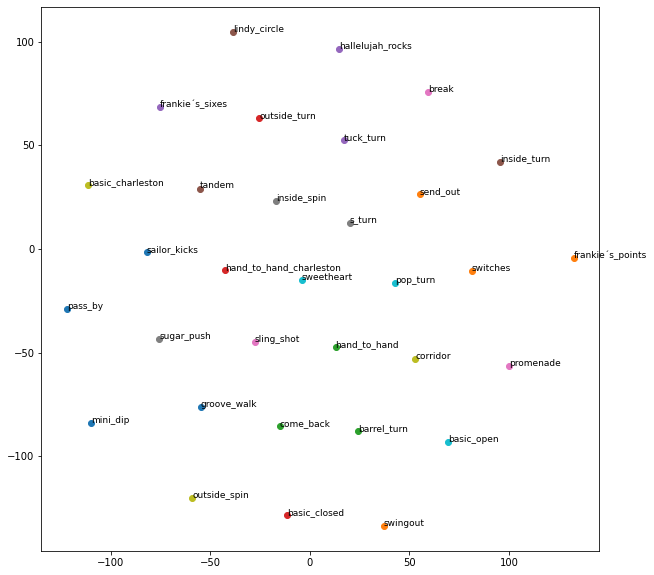

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Retrieve all vectors from the model
vectors_augmented = word2vec_model_augmented.wv.vectors

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
vectors_2d = tsne.fit_transform(vectors_augmented)

# Plotting
plt.figure(figsize=(10, 10))
for i, move in enumerate(word2vec_model_augmented.wv.key_to_index):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.text(vectors_2d[i, 0]+0.03, vectors_2d[i, 1]+0.03, move, fontsize=9)
plt.show()

#### Create an embedding matrix for use in LSTM

#### Encode sequences


In [115]:
#train data
all_sequences_train

#test data
all_augmented_sequences_test

[['basic_closed',
  'pop_turn',
  'frankie´s_sixes',
  'come_back',
  'swingout',
  'break',
  'pass_by',
  'pass_by',
  'swingout',
  'lindy_circle',
  'tuck_turn',
  'outside_spin',
  'corridor',
  'inside_spin',
  'outside_turn',
  'sugar_push',
  'sugar_push',
  'sweetheart',
  'barrel_turn',
  'basic_closed',
  'send_out',
  'sailor_kicks'],
 ['hand_to_hand_charleston',
  'frankie´s_sixes',
  'come_back',
  'tuck_turn',
  'pass_by',
  'pass_by',
  'lindy_circle',
  'corridor',
  'swingout',
  'swingout',
  'inside_turn',
  'basic_closed',
  'basic_closed',
  'break',
  'sweetheart',
  'inside_spin',
  'outside_turn',
  'barrel_turn',
  'outside_spin',
  'sugar_push',
  'sugar_push',
  'sailor_kicks',
  'sailor_kicks'],
 ['swingout',
  'swingout',
  'lindy_circle',
  'tuck_turn',
  'frankie´s_sixes',
  'come_back',
  'groove_walk',
  'groove_walk',
  'sweetheart',
  'pass_by',
  'pass_by',
  'sugar_push',
  'sugar_push',
  'sailor_kicks',
  'sailor_kicks',
  'barrel_turn',
  'break

In [44]:
# Flatten all sequences into a single list to find unique moves
all_moves = [move for sequence in lists_extracted for move in sequence]

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(all_moves)

# Number of unique classes (moves)
num_classes = len(label_encoder.classes_)

# Function to convert moves to integers
def encode_sequence(sequence):
    # Encode the sequence
    return label_encoder.transform(sequence)


In [143]:
# Apply encoding to each sequence for train dataset
encoded_sequences_augmented_train = [encode_sequence(sequence) for sequence in all_sequences_train]
encoded_sequences_augmented_train

# Apply encoding to each sequence for test dataset
encoded_sequences_augmented_test = [encode_sequence(sequence) for sequence in all_augmented_sequences_test]
encoded_sequences_augmented_test

[array([24, 19, 19, 27,  9,  9, 28,  5, 28,  4, 15, 31, 17, 26, 26,  8,  3,
         3,  4, 14, 11, 14,  0,  2,  2, 21, 21, 24, 23, 23,  0, 18, 15, 13,
         5,  6, 12,  8, 10, 10]),
 array([14, 31, 19, 19, 28, 28, 15,  9,  4, 18, 26,  5,  2, 21, 21, 24,  8,
         2,  6, 13,  5,  9, 27, 17,  0,  0,  4, 29, 29, 15, 20, 20,  8, 26,
        22, 30, 30]),
 array([10, 10,  8, 19, 19,  5,  2, 28, 18, 28, 11, 14, 31, 17,  0,  4, 29,
        15,  2, 21,  9,  9, 13, 15, 24, 26, 27, 27,  5, 21, 31, 26,  3,  3,
         4, 29]),
 array([13,  5, 28, 19, 19, 26, 26, 28,  4, 15, 20,  8,  6, 31, 18, 17,  0,
        27, 14, 11, 11, 14,  2,  2, 21, 21, 24, 23, 23,  0,  4, 29, 29,  5,
         9,  9, 31, 17, 18, 15]),
 array([16, 19, 19,  3,  3,  4, 31, 27,  5,  2,  2,  9,  9, 28, 28, 15, 14,
        26, 26,  8, 10, 10,  8,  0, 18, 17,  6, 12, 12]),
 array([11, 19, 19,  4, 14,  5,  2, 28, 28, 15, 31, 29, 29, 15,  2, 20,  8,
        26, 26, 27, 17, 18,  0, 17,  6, 13, 13,  5, 21, 21, 24, 23, 23,  0

In [118]:
# Create a mapping from moves to indices using the LabelEncoder
move_to_index = {move: index for index, move in enumerate(label_encoder.classes_)}

# Print the mapping
print(move_to_index)



{'barrel_turn': 0, 'basic_charleston': 1, 'basic_closed': 2, 'basic_open': 3, 'break': 4, 'come_back': 5, 'corridor': 6, 'frankie´s_points': 7, 'frankie´s_sixes': 8, 'groove_walk': 9, 'hallelujah_rocks': 10, 'hand_to_hand': 11, 'hand_to_hand_charleston': 12, 'inside_spin': 13, 'inside_turn': 14, 'lindy_circle': 15, 'mini_dip': 16, 'outside_spin': 17, 'outside_turn': 18, 'pass_by': 19, 'pop_turn': 20, 'promenade': 21, 's_turn': 22, 'sailor_kicks': 23, 'send_out': 24, 'sling_shot': 25, 'sugar_push': 26, 'sweetheart': 27, 'swingout': 28, 'switches': 29, 'tandem': 30, 'tuck_turn': 31}


#### Embedding matrix vector size 100

In [27]:
from gensim.models import FastText

# load embedding model with augmented data
word2vec_model_augmented = FastText.load("lindyhop_moves_word2vec_augmented.model")

In [34]:
import numpy as np
# Create embedding matrix of vector size 100
embedding_matrix_augmented = np.zeros((len(move_to_index), 100)) 

for move, i in move_to_index.items():
    if move in word2vec_model_augmented.wv:
        embedding_matrix_augmented[i] = word2vec_model_augmented.wv[move]

In [35]:
len(embedding_matrix_augmented)

32

In [36]:
# save embedding_matrix
np.save('embedding_matrix_augmented_word2vec_100.npy', embedding_matrix_augmented)

# load it
#loaded_embedding_matrix = np.load('embedding_matrix.npy')

#### Prepare input-output pairs for LSTM

Augmented sequences are being used only for the test datasets. Therefore, 15 sequences from augmented sequences were extracted and prepared for test datasets separately.

In [60]:
# Load all augmented sequences

import pandas as pd

with open('all_augmented_sequences.csv', newline='', encoding='utf-8') as file:
    csvreader_all_augmented_sequences = csv.reader(file)  # Ensure delimiter matches what was used in saving
    rows_all_augmented_sequences = list(csvreader_all_augmented_sequences)

# Convert the list of rows to a DataFrame
all_augmented_sequences = pd.DataFrame(rows_all_augmented_sequences)
all_augmented_sequences = [list(filter(lambda x: x is not None, row)) for row in all_augmented_sequences.values.tolist()]


with open('original_sequences_val.csv', newline='', encoding='utf-8') as file:
    csvreader_original_sequences_val = csv.reader(file)  # Ensure delimiter matches what was used in saving
    rows_original_sequences_val = list(csvreader_original_sequences_val)

# Convert the list of rows to a DataFrame
original_sequences_val = pd.DataFrame(rows_original_sequences_val)
original_sequences_val = [list(filter(lambda x: x is not None, row)) for row in original_sequences_val.values.tolist()]


with open('all_sequences_train.csv', newline='', encoding='utf-8') as file:
    csvreader_all_sequences_train = csv.reader(file)  # Ensure delimiter matches what was used in saving
    rows_all_sequences_train = list(csvreader_all_sequences_train)

# Convert the list of rows to a DataFrame
all_sequences_train = pd.DataFrame(rows_all_sequences_train)
all_sequences_train = [list(filter(lambda x: x is not None, row)) for row in all_sequences_train.values.tolist()]


with open('all_sequences_augmented_original.csv', newline='', encoding='utf-8') as file:
    csvreader_all_sequences_augmented_original = csv.reader(file)  # Ensure delimiter matches what was used in saving
    rows_all_sequences_augmented_original = list(csvreader_all_sequences_augmented_original)

# Convert the list of rows to a DataFrame
all_sequences_augmented_original = pd.DataFrame(rows_all_sequences_augmented_original)
all_sequences_augmented_original = [list(filter(lambda x: x is not None, row)) for row in all_sequences_augmented_original.values.tolist()]



In [66]:
# Encode sequences to integers
# Apply encoding to each sequence for train dataset
encoded_sequences_augmented_train = [encode_sequence(sequence) for sequence in all_sequences_train]
encoded_sequences_augmented_train

# Apply encoding to each sequence for val dataset
encoded_sequences_augmented_val = [encode_sequence(sequence) for sequence in original_sequences_val]
encoded_sequences_augmented_val

[array([28, 19,  5, 31, 17, 19,  3, 19,  4, 19, 19, 19, 15, 31, 19,  5, 24,
         4, 19, 17, 19,  5, 28, 19, 26, 26, 19,  5,  4, 24, 19, 19, 19,  5,
        24, 19, 15, 31,  4, 19, 27, 19,  5, 28, 19,  4, 19,  4, 19,  5,  6,
        28,  4, 19, 19,  4, 29, 19,  5,  6]),
 array([ 2, 31, 19, 19, 27, 19, 17, 19, 28, 19, 19, 19, 26, 19, 19, 28, 19,
        19,  8, 19, 28, 19, 19, 27, 19, 19, 19, 19, 15, 31, 19, 19, 23, 19,
         8, 19, 19,  8,  4, 19, 28, 19, 19,  8, 19, 28, 19, 19, 19, 19, 28]),
 array([ 2, 31, 19, 19, 28, 19,  4, 17, 19,  5,  2,  2,  2, 31, 19, 19,  8,
        19, 28, 19, 15, 31, 19,  5, 31, 19, 19, 19, 19,  8, 19, 17, 19, 28,
        19, 15, 31,  4, 14,  5, 31, 19,  8, 19, 28, 19, 17, 19, 28, 19, 19,
        28, 19, 19, 19, 23, 19, 27]),
 array([ 2, 31, 19, 27, 19, 19, 19, 28, 19, 23, 19,  8,  0, 28, 19, 19, 19,
        19, 19, 19, 19, 19, 19,  8, 19, 28, 19, 15, 31, 17, 19, 19, 28, 19,
        19, 19, 19, 28, 19, 19,  4, 19, 28, 19, 19, 19, 27, 19, 28, 19, 19,
  

In [121]:
# train data
encoded_sequences_augmented_train

# test data
encoded_sequences_augmented_val

[array([ 2, 20,  8,  5, 28,  4, 19, 19, 28, 15, 31, 17,  6, 13, 18, 26, 26,
        27,  0,  2, 24, 23]),
 array([12,  8,  5, 31, 19, 19, 15,  6, 28, 28, 14,  2,  2,  4, 27, 13, 18,
         0, 17, 26, 26, 23, 23]),
 array([28, 28, 15, 31,  8,  5,  9,  9, 27, 19, 19, 26, 26, 23, 23,  0,  4,
        18, 17,  6, 13]),
 array([19, 19,  3,  3, 15, 31, 17,  4,  2,  2,  6, 28, 28,  5, 24, 26, 26,
        25, 25, 15,  9]),
 array([18, 28, 19,  8,  5, 24,  4, 15, 31, 19, 26, 26, 28, 14,  2, 20,  8,
         2,  6, 13]),
 array([ 9,  9,  2,  2, 21, 21, 28, 28,  6, 19, 19, 17,  8, 15, 31,  4, 24,
        26, 26, 23, 23,  0, 27, 18]),
 array([21, 21, 31, 17, 19, 19,  5,  9, 15, 14, 11, 11, 14, 28, 28,  6, 13,
        18, 26, 26, 22, 30, 30,  4,  0, 27,  8, 10]),
 array([24, 19, 19,  5,  2, 31, 26, 28, 28,  4, 15, 14, 11, 11, 14,  0, 17,
        26, 23, 23]),
 array([10,  4, 31, 17, 19, 19,  5, 28, 28, 15, 24,  8,  0, 18, 27, 14,  2,
         2, 21, 21,  9,  9, 13]),
 array([31, 17, 26, 19, 19, 28

In [67]:
x_emb_aug_train, y_emb_aug_train = create_input_output_pairs_mtm(encoded_sequences_augmented_train, 4)
x_emb_aug_val, y_emb_aug_val = create_input_output_pairs_mtm(encoded_sequences_augmented_val, 4)


In [68]:
# Convert inputs to Numpy Arrays
x_emb_aug_train = np.array(x_emb_aug_train)
x_emb_aug_val = np.array(x_emb_aug_val)

# Convert outputs to a one-hot-encoded vector
y_emb_aug_train_one_hot = to_categorical(y_emb_aug_train, num_classes=num_classes)
y_emb_aug_val_one_hot = to_categorical(y_emb_aug_val, num_classes=num_classes)

In [69]:
# Check shapes
print("Shape of x_emb_aug_train:", x_emb_aug_train.shape)
print("Shape of y_emb_aug_train_one_hot:", y_emb_aug_train_one_hot.shape)

Shape of x_emb_aug_train: (2464, 4)
Shape of y_emb_aug_train_one_hot: (2464, 4, 32)


#### Baseline LSTM with trained word2vec embeddings

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, TimeDistributed, Dense, Embedding
import random

# Set the random seed
seed_value = 25
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Parameters
input_length = 4  # Length of input sequences
num_moves = len(embedding_matrix_augmented)  # Number of unique moves
embedding_dim = len(embedding_matrix_augmented[0])  # Dimension of Word2Vec embeddings

# Define the LSTM model with the Embedding layer
Emb_model_aug = Sequential([
    # Embedding layer with pre-trained Word2Vec weights
    Embedding(input_dim=num_moves, output_dim=embedding_dim, weights=[embedding_matrix_augmented], trainable=False, 
              input_length=input_length),
    
    # LSTM layer
    LSTM(64, return_sequences=True),
    
    # Dropout for regularization
    Dropout(0.2),

    # TimeDistributed Dense layer for output at each time step
    TimeDistributed(Dense(num_moves, activation='softmax'))  
])

# Compile the model
Emb_model_aug.compile(optimizer='adam', 
                           loss='categorical_crossentropy', 
                           metrics=['accuracy'])

# Summary of the model
Emb_model_aug.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4, 100)            3200      
_________________________________________________________________
lstm_10 (LSTM)               (None, 4, 64)             42240     
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 64)             0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 4, 32)             2080      
Total params: 47,520
Trainable params: 44,320
Non-trainable params: 3,200
_________________________________________________________________


In [110]:
# Fitting the model
history_emb_aug = Emb_model_aug.fit(x_emb_aug_train, y_emb_aug_train_one_hot,
                                 epochs=1000,
                                 batch_size=16,
                                 validation_data=(x_emb_aug_val, y_emb_aug_val_one_hot)
                                 )

Epoch 1/1000
154/154 [==============================] - 2s 6ms/step - loss: 3.1838 - accuracy: 0.1450 - val_loss: 2.5336 - val_accuracy: 0.4066
Epoch 2/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.8963 - accuracy: 0.1653 - val_loss: 2.5362 - val_accuracy: 0.3937
Epoch 3/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.8539 - accuracy: 0.1791 - val_loss: 2.5060 - val_accuracy: 0.4021
Epoch 4/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.8426 - accuracy: 0.1678 - val_loss: 2.4739 - val_accuracy: 0.4037
Epoch 5/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.8072 - accuracy: 0.1803 - val_loss: 2.4737 - val_accuracy: 0.4034
Epoch 6/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.8003 - accuracy: 0.1803 - val_loss: 2.4569 - val_accuracy: 0.4027
Epoch 7/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.7868 - accuracy: 0.1794 - val_loss: 2.4327 - val_accuracy:

In [111]:
print_metrics(history_emb_aug)

Best Epoch for Validation Accuracy: 49 (Val Accuracy: 0.42300257086753845)
Best Epoch for Training Accuracy: 979 (Train Accuracy: 0.48833197355270386)
Best Epoch for Training Loss: 999 (Train Loss: 1.4965800046920776)
Best Epoch for Validation Loss: 84 (Val Loss: 2.144578456878662)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.42300257086753845
Maximum Training Accuracy: 0.48833197355270386
Minimum Training Loss: 1.4965800046920776
Minimum Validation Loss: 2.144578456878662


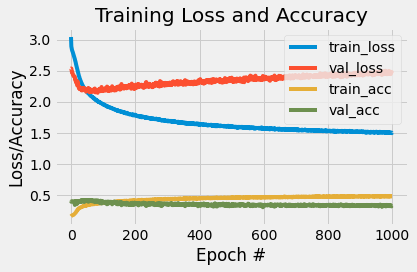

In [112]:
# plot
plot_history(history_emb_aug, epochs = 1000)

In [81]:
# Save the model
model_file = "many_to_many_emb_LSTM_baseline_aug_model.h5"  
Emb_model_aug.save(model_file)

import pickle
# Save the training history
history_file = "many_to_many_emb_LSTM_baseline_aug_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_emb_aug.history, file)



#### More complex LSTM with trained word2vec embeddings

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, TimeDistributed
from tensorflow.keras.regularizers import l1_l2

# Set the random seed
seed_value = 98
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Parameters
input_length = 4  # Length of input sequences
num_moves = len(embedding_matrix_augmented)  # Number of unique moves
embedding_dim = len(embedding_matrix_augmented[0])  # Dimension of Word2Vec embeddings


# Define the LSTM model with an Embedding layer
Emb_model_aug_complex = Sequential([
    # Embedding layer with pre-trained Word2Vec weights
    Embedding(input_dim=num_moves, output_dim=embedding_dim,  weights=[embedding_matrix_augmented], trainable=False, 
              input_length=input_length),

    # First LSTM layer
    LSTM(64, return_sequences=True),
    Dropout(0.4),

    # Second LSTM layer
    LSTM(32, return_sequences=True),
    Dropout(0.4),

    # Dense layer
    TimeDistributed(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),

    # Output layer
    TimeDistributed(Dense(32, activation='softmax'))  
])

# Compile the model
Emb_model_aug_complex.compile(optimizer='adam', 
                                   loss='categorical_crossentropy', 
                                   metrics=['accuracy'])

# Summary of the model
Emb_model_aug_complex.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 100)            3200      
_________________________________________________________________
lstm_4 (LSTM)                (None, 4, 64)             42240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 4, 32)             12416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 4, 64)             2112      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 4, 32)            

In [78]:
# Fitting the model
history_emb_aug_complex = Emb_model_aug_complex.fit(x_emb_aug_train, y_emb_aug_train_one_hot,
                                 epochs=1000,
                                 batch_size=16,
                                 validation_data=(x_emb_aug_val, y_emb_aug_val_one_hot)
                                 )

Epoch 1/1000
154/154 [==============================] - 4s 10ms/step - loss: 3.2747 - accuracy: 0.1429 - val_loss: 2.5588 - val_accuracy: 0.4069
Epoch 2/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.9552 - accuracy: 0.1685 - val_loss: 2.5373 - val_accuracy: 0.4069
Epoch 3/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.9334 - accuracy: 0.1761 - val_loss: 2.5373 - val_accuracy: 0.4069
Epoch 4/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.9428 - accuracy: 0.1682 - val_loss: 2.5313 - val_accuracy: 0.4069
Epoch 5/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.9352 - accuracy: 0.1714 - val_loss: 2.5380 - val_accuracy: 0.4069
Epoch 6/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.9393 - accuracy: 0.1707 - val_loss: 2.4725 - val_accuracy: 0.4069
Epoch 7/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.9308 - accuracy: 0.1701 - val_loss: 2.5096 - val_accuracy

In [79]:
print_metrics(history_emb_aug_complex)

Best Epoch for Validation Accuracy: 57 (Val Accuracy: 0.42783504724502563)
Best Epoch for Training Accuracy: 989 (Train Accuracy: 0.41010552644729614)
Best Epoch for Training Loss: 997 (Train Loss: 1.7844914197921753)
Best Epoch for Validation Loss: 272 (Val Loss: 2.1304123401641846)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.42783504724502563
Maximum Training Accuracy: 0.41010552644729614
Minimum Training Loss: 1.7844914197921753
Minimum Validation Loss: 2.1304123401641846


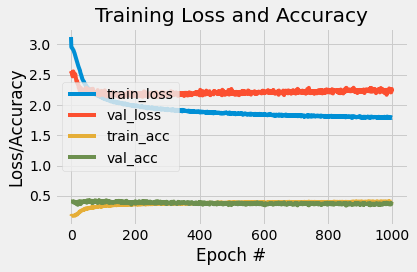

In [80]:
# plot
plot_history(history_emb_aug_complex, epochs = 1000)

In [82]:
# Save the model
model_file = "many_to_many_emb_LSTM_complex_aug_model.h5"  
Emb_model_aug_complex.save(model_file)
import pickle

# Save the training history
history_file = "many_to_many_emb_LSTM_complex_aug_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_emb_aug_complex.history, file)

In [84]:
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

# Predict labels on the test data
predictions = Emb_model_aug_complex.predict(x_emb_aug_val)

# Convert one-hot encoded predictions to single labels using TensorFlow's argmax
predicted_labels_encoded = tf.argmax(predictions, axis=-1).numpy()

# Flatten the arrays for label-wise accuracy calculation
predicted_labels_encoded = predicted_labels_encoded.flatten()

# Convert one-hot encoded true labels to single labels using TensorFlow's argmax
true_labels_encoded = tf.argmax(y_emb_aug_val_one_hot, axis=-1).numpy().flatten()

# Map predicted labels to original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Map true labels to original labels
true_labels = label_encoder.inverse_transform(true_labels_encoded)

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Accuracy: {overall_accuracy}')

# Display label-wise accuracy
unique_labels = label_encoder.classes_
for label in unique_labels:
    label_indices = true_labels == label
    label_accuracy = accuracy_score(true_labels[label_indices], predicted_labels[label_indices])
    print(f'Accuracy for Label {label}: {label_accuracy}')


Overall Accuracy: 0.35728092783505155
Accuracy for Label barrel_turn: 0.1
Accuracy for Label basic_charleston: nan
Accuracy for Label basic_closed: 0.5737704918032787
Accuracy for Label basic_open: 0.0
Accuracy for Label break: 0.06132075471698113
Accuracy for Label come_back: 0.02962962962962963
Accuracy for Label corridor: 0.0
Accuracy for Label frankie´s_points: nan
Accuracy for Label frankie´s_sixes: 0.0
Accuracy for Label groove_walk: 0.0
Accuracy for Label hallelujah_rocks: 0.0
Accuracy for Label hand_to_hand: 0.0
Accuracy for Label hand_to_hand_charleston: nan
Accuracy for Label inside_spin: 0.0
Accuracy for Label inside_turn: 0.11627906976744186
Accuracy for Label lindy_circle: 0.02857142857142857
Accuracy for Label mini_dip: 0.0
Accuracy for Label outside_spin: 0.01
Accuracy for Label outside_turn: 0.027777777777777776
Accuracy for Label pass_by: 0.6555819477434679
Accuracy for Label pop_turn: 0.0
Accuracy for Label promenade: 0.0
Accuracy for Label s_turn: 0.0
Accuracy for La

/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/cds-au605619/cds-language/lang101/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in

### Many-to-Many LSTM model (one-hot encodings)

#### Prepare the iput-output data 

In [85]:
# Encode sequences to integers
# Apply encoding to each sequence for train dataset
encoded_sequences_augmented_train = [encode_sequence(sequence) for sequence in all_sequences_train]
encoded_sequences_augmented_train

# Apply encoding to each sequence for val dataset
encoded_sequences_augmented_val = [encode_sequence(sequence) for sequence in original_sequences_val]
encoded_sequences_augmented_val


[array([28, 19,  5, 31, 17, 19,  3, 19,  4, 19, 19, 19, 15, 31, 19,  5, 24,
         4, 19, 17, 19,  5, 28, 19, 26, 26, 19,  5,  4, 24, 19, 19, 19,  5,
        24, 19, 15, 31,  4, 19, 27, 19,  5, 28, 19,  4, 19,  4, 19,  5,  6,
        28,  4, 19, 19,  4, 29, 19,  5,  6]),
 array([ 2, 31, 19, 19, 27, 19, 17, 19, 28, 19, 19, 19, 26, 19, 19, 28, 19,
        19,  8, 19, 28, 19, 19, 27, 19, 19, 19, 19, 15, 31, 19, 19, 23, 19,
         8, 19, 19,  8,  4, 19, 28, 19, 19,  8, 19, 28, 19, 19, 19, 19, 28]),
 array([ 2, 31, 19, 19, 28, 19,  4, 17, 19,  5,  2,  2,  2, 31, 19, 19,  8,
        19, 28, 19, 15, 31, 19,  5, 31, 19, 19, 19, 19,  8, 19, 17, 19, 28,
        19, 15, 31,  4, 14,  5, 31, 19,  8, 19, 28, 19, 17, 19, 28, 19, 19,
        28, 19, 19, 19, 23, 19, 27]),
 array([ 2, 31, 19, 27, 19, 19, 19, 28, 19, 23, 19,  8,  0, 28, 19, 19, 19,
        19, 19, 19, 19, 19, 19,  8, 19, 28, 19, 15, 31, 17, 19, 19, 28, 19,
        19, 19, 19, 28, 19, 19,  4, 19, 28, 19, 19, 19, 27, 19, 28, 19, 19,
  

In [88]:
x_aug_train, y_aug_train = create_input_output_pairs_mtm(encoded_sequences_augmented_train, 4)
x_aug_val, y_aug_val = create_input_output_pairs_mtm(encoded_sequences_augmented_val, 4)

In [89]:
# Convert x and y to one-hot encoding
x_aug_train_one_hot = to_categorical(x_aug_train, num_classes=num_classes)
y_aug_train_one_hot = to_categorical(y_aug_train, num_classes=num_classes)
x_aug_val_one_hot = to_categorical(x_aug_val, num_classes=num_classes)
y_aug_val_one_hot = to_categorical(y_aug_val, num_classes=num_classes)

# Check shapes
print("Shape of xx:", x_aug_train_one_hot.shape)
print("Shape of yy:", y_aug_train_one_hot.shape)



Shape of xx: (2464, 4, 32)
Shape of yy: (2464, 4, 32)


In [90]:
len(y_aug_val_one_hot)

776

In [91]:
# Convert to TensorFlow tensors
x_aug_train_tensor = tf.convert_to_tensor(x_aug_train_one_hot)
x_aug_val_tensor = tf.convert_to_tensor(x_aug_val_one_hot)
y_aug_train_tensor = tf.convert_to_tensor(y_aug_train_one_hot)
y_aug_val_tensor = tf.convert_to_tensor(y_aug_val_one_hot)

# Check shapes
print("Shape of xx:", x_aug_train_tensor.shape)
print("Shape of yy:", x_aug_val_tensor.shape)

Shape of xx: (2464, 4, 32)
Shape of yy: (776, 4, 32)


#### A baseline Many-to-Many LSTM model

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
import random


# Set a new random seed
new_seed = 33
tf.random.set_seed(new_seed)
np.random.seed(new_seed)
random.seed(new_seed)

# Define the LSTM model for many-to-many
many_to_many_model_aug_baseline = Sequential([
    LSTM(64, input_shape=(4, 32), return_sequences=True),  # 64 units, return full sequence
    Dropout(0.2),                                         # Dropout for regularization
    TimeDistributed(Dense(32, activation='softmax'))      # Apply Dense layer to each timestep
])

# Compile the model
many_to_many_model_aug_baseline.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
many_to_many_model_aug_baseline.summary()




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4, 64)             24832     
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 32)             2080      
Total params: 26,912
Trainable params: 26,912
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Fit the model
history_many_to_many_aug_baseline = many_to_many_model_aug_baseline.fit(x_aug_train_tensor, y_aug_train_tensor, 
                                              epochs=1000,  # Adjust the number of epochs based on training performance
                                              batch_size=16,  # Batch size
                                              validation_data=(x_aug_val_tensor, y_aug_val_tensor)  # Validation data
                                               ) 


Epoch 1/1000
154/154 [==============================] - 2s 6ms/step - loss: 3.2991 - accuracy: 0.1475 - val_loss: 2.6155 - val_accuracy: 0.3882
Epoch 2/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.8063 - accuracy: 0.2137 - val_loss: 2.3412 - val_accuracy: 0.4217
Epoch 3/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.5422 - accuracy: 0.2885 - val_loss: 2.2509 - val_accuracy: 0.4082
Epoch 4/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.3160 - accuracy: 0.3305 - val_loss: 2.2213 - val_accuracy: 0.3995
Epoch 5/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.1938 - accuracy: 0.3585 - val_loss: 2.2282 - val_accuracy: 0.3660
Epoch 6/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.1211 - accuracy: 0.3587 - val_loss: 2.2074 - val_accuracy: 0.3744
Epoch 7/1000
154/154 [==============================] - 0s 3ms/step - loss: 2.0527 - accuracy: 0.3688 - val_loss: 2.2024 - val_accuracy:

In [96]:
print_metrics(history_many_to_many_aug_baseline)


Best Epoch for Validation Accuracy: 2 (Val Accuracy: 0.4217139184474945)
Best Epoch for Training Accuracy: 972 (Train Accuracy: 0.5283076167106628)
Best Epoch for Training Loss: 913 (Train Loss: 1.2979365587234497)
Best Epoch for Validation Loss: 16 (Val Loss: 2.1556556224823)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.4217139184474945
Maximum Training Accuracy: 0.5283076167106628
Minimum Training Loss: 1.2979365587234497
Minimum Validation Loss: 2.1556556224823


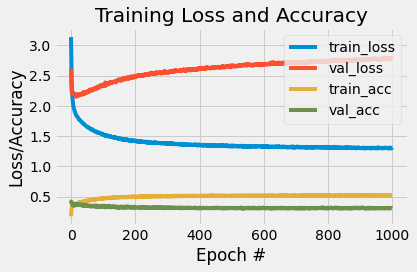

In [97]:
# plot
plot_history(history_many_to_many_aug_baseline, epochs = 1000)

In [98]:
# Save the model
model_file = "many_to_many_LSTM_baseline_aug_model.h5"  
many_to_many_model_aug_baseline.save(model_file)
import pickle

# Save the training history
history_file = "many_to_many_LSTM_baseline_aug_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_aug_baseline.history, file)

#### A more complex Many-to-Many LSTM model

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
import random
from tensorflow.keras.regularizers import l1_l2

# Set a new random seed
new_seed = 27
tf.random.set_seed(new_seed)
np.random.seed(new_seed)
random.seed(new_seed)

# Define a simplified LSTM model
many_to_many_model_aug_complex = Sequential([
    LSTM(64, return_sequences=True, input_shape=(4, 32)),  # Unidirectional LSTM
    Dropout(0.4),
    LSTM(32, return_sequences=True),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dense(32, activation='softmax')
])

# Compile the simplified model
many_to_many_model_aug_complex.compile(optimizer='adam', 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])

# Summary of the simplified model
many_to_many_model_aug_complex.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 4, 64)             24832     
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 4, 32)             12416     
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 4, 64)             2112      
_________________________________________________________________
dense_8 (Dense)              (None, 4, 32)             2080      
Total params: 41,440
Trainable params: 41,440
Non-trainable params: 0
__________________________________________________

In [101]:
# Fit the model
history_many_to_many_aug_complex = many_to_many_model_aug_complex.fit(x_aug_train_tensor, y_aug_train_tensor, 
                                              epochs=1000,  # Adjust the number of epochs based on training performance
                                              batch_size=16,  # Batch size
                                              validation_data=(x_aug_val_tensor, y_aug_val_tensor)  # Validation data
                                               ) 


Epoch 1/1000
154/154 [==============================] - 2s 5ms/step - loss: 2.3196 - accuracy: 0.2949 - val_loss: 2.2137 - val_accuracy: 0.3950
Epoch 2/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.2656 - accuracy: 0.3077 - val_loss: 2.2222 - val_accuracy: 0.4037
Epoch 3/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.2183 - accuracy: 0.3182 - val_loss: 2.2122 - val_accuracy: 0.3911
Epoch 4/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.1935 - accuracy: 0.3291 - val_loss: 2.2053 - val_accuracy: 0.3940
Epoch 5/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.1633 - accuracy: 0.3327 - val_loss: 2.2043 - val_accuracy: 0.3860
Epoch 6/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.1428 - accuracy: 0.3378 - val_loss: 2.2126 - val_accuracy: 0.3750
Epoch 7/1000
154/154 [==============================] - 1s 5ms/step - loss: 2.1252 - accuracy: 0.3420 - val_loss: 2.1827 - val_accuracy:

In [102]:
print_metrics(history_many_to_many_aug_complex)

Best Epoch for Validation Accuracy: 2 (Val Accuracy: 0.4036726951599121)
Best Epoch for Training Accuracy: 969 (Train Accuracy: 0.48711445927619934)
Best Epoch for Training Loss: 981 (Train Loss: 1.508829116821289)
Best Epoch for Validation Loss: 26 (Val Loss: 2.134901523590088)

Overall Best Performance Metrics:
Maximum Validation Accuracy: 0.4036726951599121
Maximum Training Accuracy: 0.48711445927619934
Minimum Training Loss: 1.508829116821289
Minimum Validation Loss: 2.134901523590088


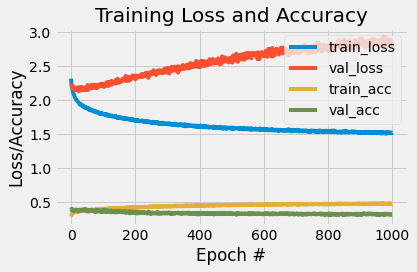

In [103]:
# plot
plot_history(history_many_to_many_aug_complex, epochs = 1000)

In [104]:
# Save the model
model_file = "many_to_many_LSTM_complex_aug_model.h5"  
many_to_many_model_aug_complex.save(model_file)
import pickle

# Save the training history
history_file = "many_to_many_LSTM_complex_aug_model_history_bs16.pkl"
with open(history_file, 'wb') as file:
    pickle.dump(history_many_to_many_aug_complex.history, file)

## Other functions

In [4]:
def get_word2vec_enc(moves):
    """
    get word2vec value for each move in sequence.
    
    """
    encoded_moves = []
    for move in moves:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews


def preprocess(df):
    """
    encode text value to numeric value
    """
    # encode words into word2vec
    reviews = df['review'].tolist()
    
    encoded_reviews = get_word2vec_enc(reviews)
    padded_encoded_reviews = get_padded_encoded_reviews(encoded_reviews)
    # encoded sentiment
    sentiments = df['sentiment'].tolist()
    encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]
    X = np.array(padded_encoded_reviews)
    Y = np.array(encoded_sentiment)
    return X, Y 

PermissionDeniedError: /tmp/tfhub_modules/22bffebf9723377261c6cd19440f9601d0ec68d6.lock.tmpeed7096edc09413a99f24b4a8ed170c4; Permission denied

In [ ]:
# create input-output pairs
xx, yy = make_x_y(4, )

In [75]:
import numpy as np

# function to split the sequence data into input and target arrays taking into account the separate sequences (separate dance couples)
def make_x_y_emb(ts, data):
    """
    Parameters:
    ts : int
        Time steps for the sliding window.
    data : list of lists
        List of move sequences.

    This function creates two arrays, x and y. 
    x is the input data and y is the target data.
    """
    x, y = [], []
    
    for sequence in data:
        sequence_length = len(sequence)
        for offset in range(sequence_length - ts):
            x.append(sequence[offset:offset + ts])
            y.append(sequence[offset + ts])
    x = ' '.join([str(element) for element in x])       
    y = ' '.join([str(element) for element in y])  
    return x, y


# convert the input-output pairs to word embeddings
def get_word2vec_enc(ts):
    """
    get word2vec value for each move in sequence.
    
    """
    encoded_moves_xx = []
    encoded_moves_yy = []
 
    xx, yy = make_x_y_emb(ts, lists_extracted)
    # Convert dance moves to a TensorFlow tensor
    xx_tensor = tf.constant(xx, dtype=tf.string)
    yy_tensor = tf.constant(yy, dtype=tf.string)
    
     # Embed each sequence
    word2vec_embedding_xx = embed(xx_tensor)
    word2vec_embedding_yy = embed(yy_tensor)
    
    # Convert embeddings to numpy arrays
    encoded_moves_xx = np.array(word2vec_embedding_xx)
    encoded_moves_yy = np.array(word2vec_embedding_yy)

    return encoded_moves_xx, encoded_moves_yy

